<div style="display: flex; background-color:rgb(79, 110, 8); border-radius: 4px;" height="120">
    <div style="padding: 10px; width: 170px;"><img src="../gfx/LaPouleQuiChante_logo.jpg" alt="La Poule Qui Chante" height="100" style="border-radius: 4px;" /></div>
    <div style="text-align: center; display: flex; align-items: center; justify-content: center;"><h1 style="display: table-cell; vertical-align: middle;">Clustering - Visualisations</h1></div>
</div>

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 1 - Importation des librairies et chargement des données

***

### 1.1 - Importation des librairies

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas

import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_theme(style="darkgrid")

### 1.2 - Chargement des données

In [3]:
df = pd.read_csv('../data/df_merge.csv')
df.head()

Pays    Region                       Sub-region  \
0  Fédération de Russie    Europe                   Eastern Europe   
1             Indonésie      Asia               South-eastern Asia   
2               Mexique  Americas  Latin America and the Caribbean   
3               Pologne    Europe                   Eastern Europe   
4                Égypte    Africa                  Northern Africa   

    Population  Exportations  Importations  Consommation  Production  \
0  145734038.0      259000.0       52000.0     4953000.0   5308000.0   
1  267670543.0        1000.0           0.0     4077000.0   4083000.0   
2  126190788.0        8000.0     1158000.0     4950000.0   3800000.0   
3   37921592.0     1513000.0       78000.0     1177000.0   2734000.0   
4   98423598.0        3000.0       20000.0     2642000.0   2626000.0   

   Stabilité Politique  Inflation  Activité économique   Revenu    KFC  \
0                -0.92   6.694459         44120.144531  12810.0    0.0   
1                -0.44   3.670131         15415.605793   4520.0  689.0   
2                -0.69   5.527961         25351.440407  10720.0  393.0   
3                 0.50  11.528913         49338.284441  19110.0  315.0   
4                -1.03  33.884776         18524.557220   4040.0  164.0   

   Distance  
0    3530.0  
1   11695.0  
2   11767.0  
3    5014.0  
4    2026.0

In [4]:
df.set_index('Pays', inplace=True)
df.head()

Region                       Sub-region   Population  \
Pays                                                                           
Fédération de Russie    Europe                   Eastern Europe  145734038.0   
Indonésie                 Asia               South-eastern Asia  267670543.0   
Mexique               Americas  Latin America and the Caribbean  126190788.0   
Pologne                 Europe                   Eastern Europe   37921592.0   
Égypte                  Africa                  Northern Africa   98423598.0   

                      Exportations  Importations  Consommation  Production  \
Pays                                                                         
Fédération de Russie      259000.0       52000.0     4953000.0   5308000.0   
Indonésie                   1000.0           0.0     4077000.0   4083000.0   
Mexique                     8000.0     1158000.0     4950000.0   3800000.0   
Pologne                  1513000.0       78000.0     1177000.0   2734000.0   
Égypte                      3000.0       20000.0     2642000.0   2626000.0   

                      Stabilité Politique  Inflation  Activité économique  \
Pays                                                                        
Fédération de Russie                -0.92   6.694459         44120.144531   
Indonésie                           -0.44   3.670131         15415.605793   
Mexique                             -0.69   5.527961         25351.440407   
Pologne                              0.50  11.528913         49338.284441   
Égypte                              -1.03  33.884776         18524.557220   

                       Revenu    KFC  Distance  
Pays                                            
Fédération de Russie  12810.0    0.0    3530.0  
Indonésie              4520.0  689.0   11695.0  
Mexique               10720.0  393.0   11767.0  
Pologne               19110.0  315.0    5014.0  
Égypte                 4040.0  164.0    2026.0

### 1.3 - Contrôle des données

In [5]:
# Dimensions du jeu de données
df.shape

(118, 13)

In [6]:
# Types des variables
df.dtypes

Region                  object
Sub-region              object
Population             float64
Exportations           float64
Importations           float64
Consommation           float64
Production             float64
Stabilité Politique    float64
Inflation              float64
Activité économique    float64
Revenu                 float64
KFC                    float64
Distance               float64
dtype: object

In [7]:
# Vérification des valeurs manquantes
df.isna().sum()

Region                 0
Sub-region             0
Population             0
Exportations           0
Importations           0
Consommation           0
Production             0
Stabilité Politique    0
Inflation              0
Activité économique    0
Revenu                 0
KFC                    0
Distance               0
dtype: int64

### 1.4 - Analyses descriptives univariées

In [8]:
# Analyse descriptive
df.describe()

Population  Exportations  Importations  Consommation    Production  \
count  1.180000e+02  1.180000e+02  1.180000e+02  1.180000e+02  1.180000e+02   
mean   2.048724e+07  7.242373e+04  9.956780e+04  5.081356e+05  4.990424e+05   
std    3.897183e+07  2.253724e+05  2.028280e+05  9.277828e+05  9.034874e+05   
min    1.067000e+04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.208745e+06  0.000000e+00  5.000000e+03  2.800000e+04  9.250000e+03   
50%    5.487795e+06  2.000000e+03  2.300000e+04  1.380000e+05  1.155000e+05   
75%    1.805168e+07  3.400000e+04  9.375000e+04  4.947500e+05  4.825000e+05   
max    2.676705e+08  1.513000e+06  1.163000e+06  4.953000e+06  5.308000e+06   

       Stabilité Politique   Inflation  Activité économique        Revenu  \
count           118.000000  118.000000           118.000000    118.000000   
mean              0.226525    8.891120         35835.851747  20589.745763   
std               0.783475   22.176519         27169.028326  22074.705115   
min              -2.470000   -1.035301          3460.933714   2690.000000   
25%              -0.350000    3.345084         15162.653028   5452.500000   
50%               0.425000    5.080792         27434.001825  10525.000000   
75%               0.870000    8.575733         51197.498950  26982.500000   
max               1.310000  221.341644        143809.505845  95480.000000   

               KFC      Distance  
count   118.000000    118.000000  
mean     77.864407   7363.855932  
std     195.476403   5181.464761  
min       0.000000      0.000000  
25%       0.000000   3387.750000  
50%       7.500000   6739.000000  
75%      38.250000  10606.250000  
max    1131.000000  19819.000000

In [9]:
# Description des variables qualitatives
df.describe(include='object')

Region                       Sub-region
count      118                              118
unique       5                               17
top     Europe  Latin America and the Caribbean
freq        37                               28

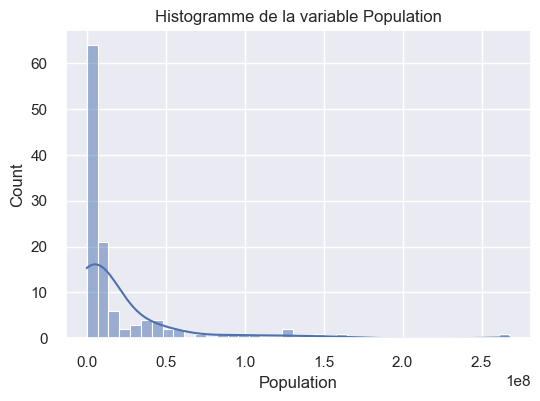

La variable Population ne suit pas une loi normale (p-value = 0.00)


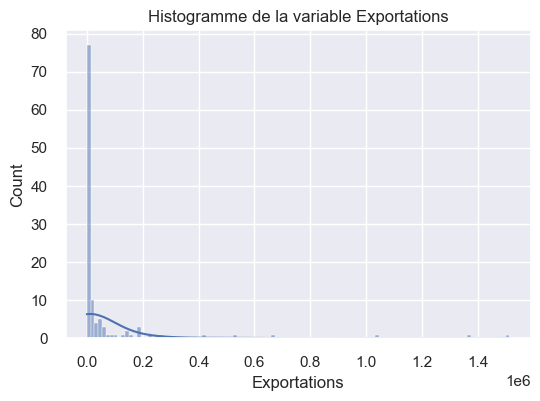

La variable Exportations ne suit pas une loi normale (p-value = 0.00)


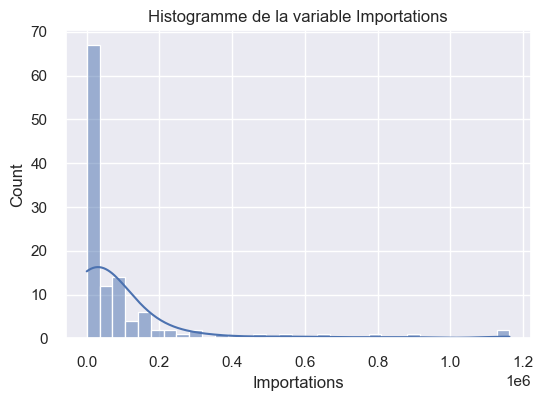

La variable Importations ne suit pas une loi normale (p-value = 0.00)


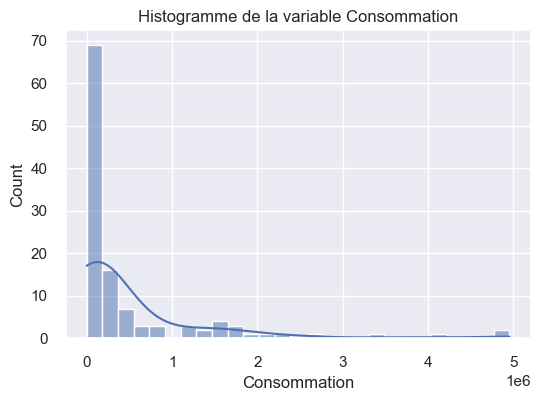

La variable Consommation ne suit pas une loi normale (p-value = 0.00)


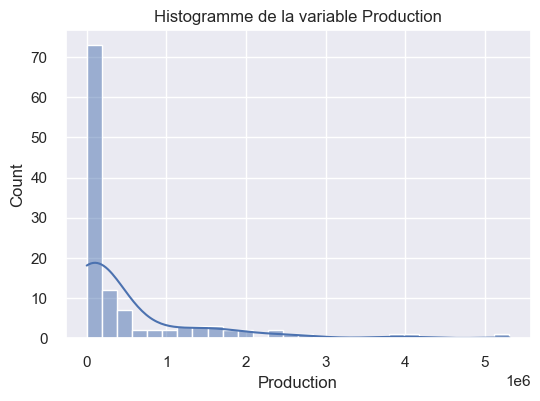

La variable Production ne suit pas une loi normale (p-value = 0.00)


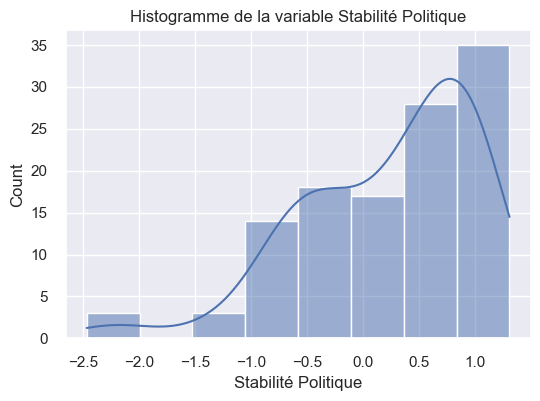

La variable Stabilité Politique ne suit pas une loi normale (p-value = 0.00)


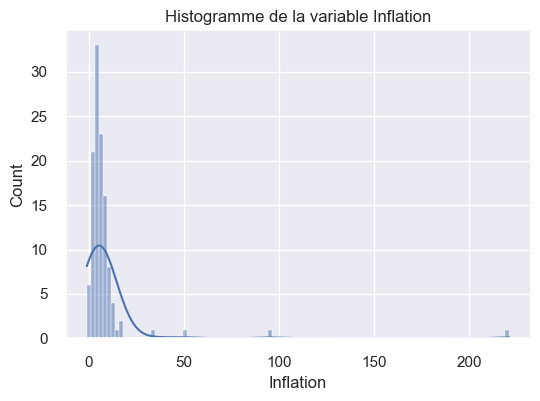

La variable Inflation ne suit pas une loi normale (p-value = 0.00)


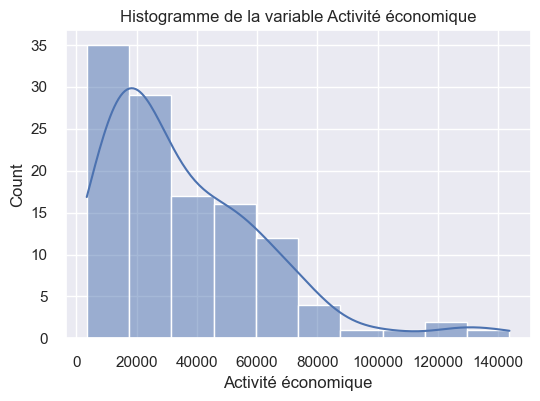

La variable Activité économique ne suit pas une loi normale (p-value = 0.00)


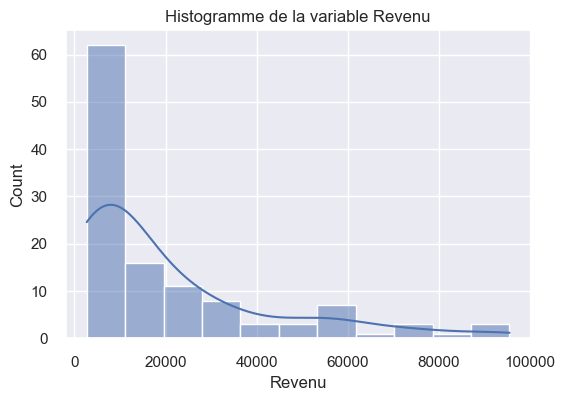

La variable Revenu ne suit pas une loi normale (p-value = 0.00)


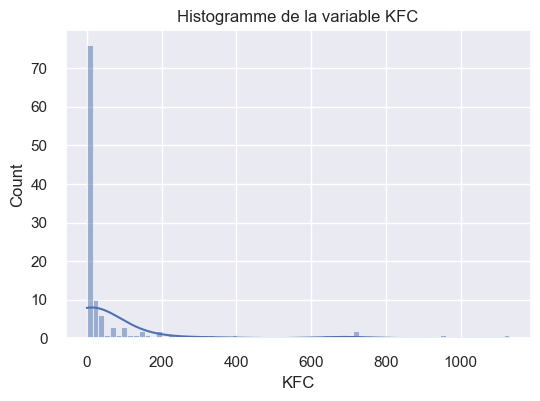

La variable KFC ne suit pas une loi normale (p-value = 0.00)


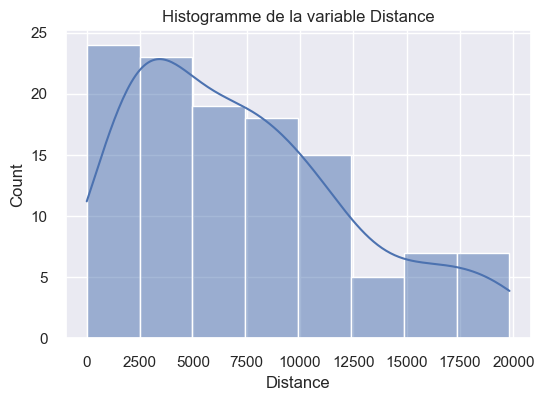

La variable Distance ne suit pas une loi normale (p-value = 0.01)


In [10]:
# Analyse de la normalité

# Sélection des variables quantitatives
df_num = df.select_dtypes(include='number')

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df_num.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_num[column], kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df_num[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value = {p_value:.2f})")
    else:
        print(f"La variable {column} suit une loi normale (p-value = {p_value:.2f})")

### 1.5 - Analyses bivariées

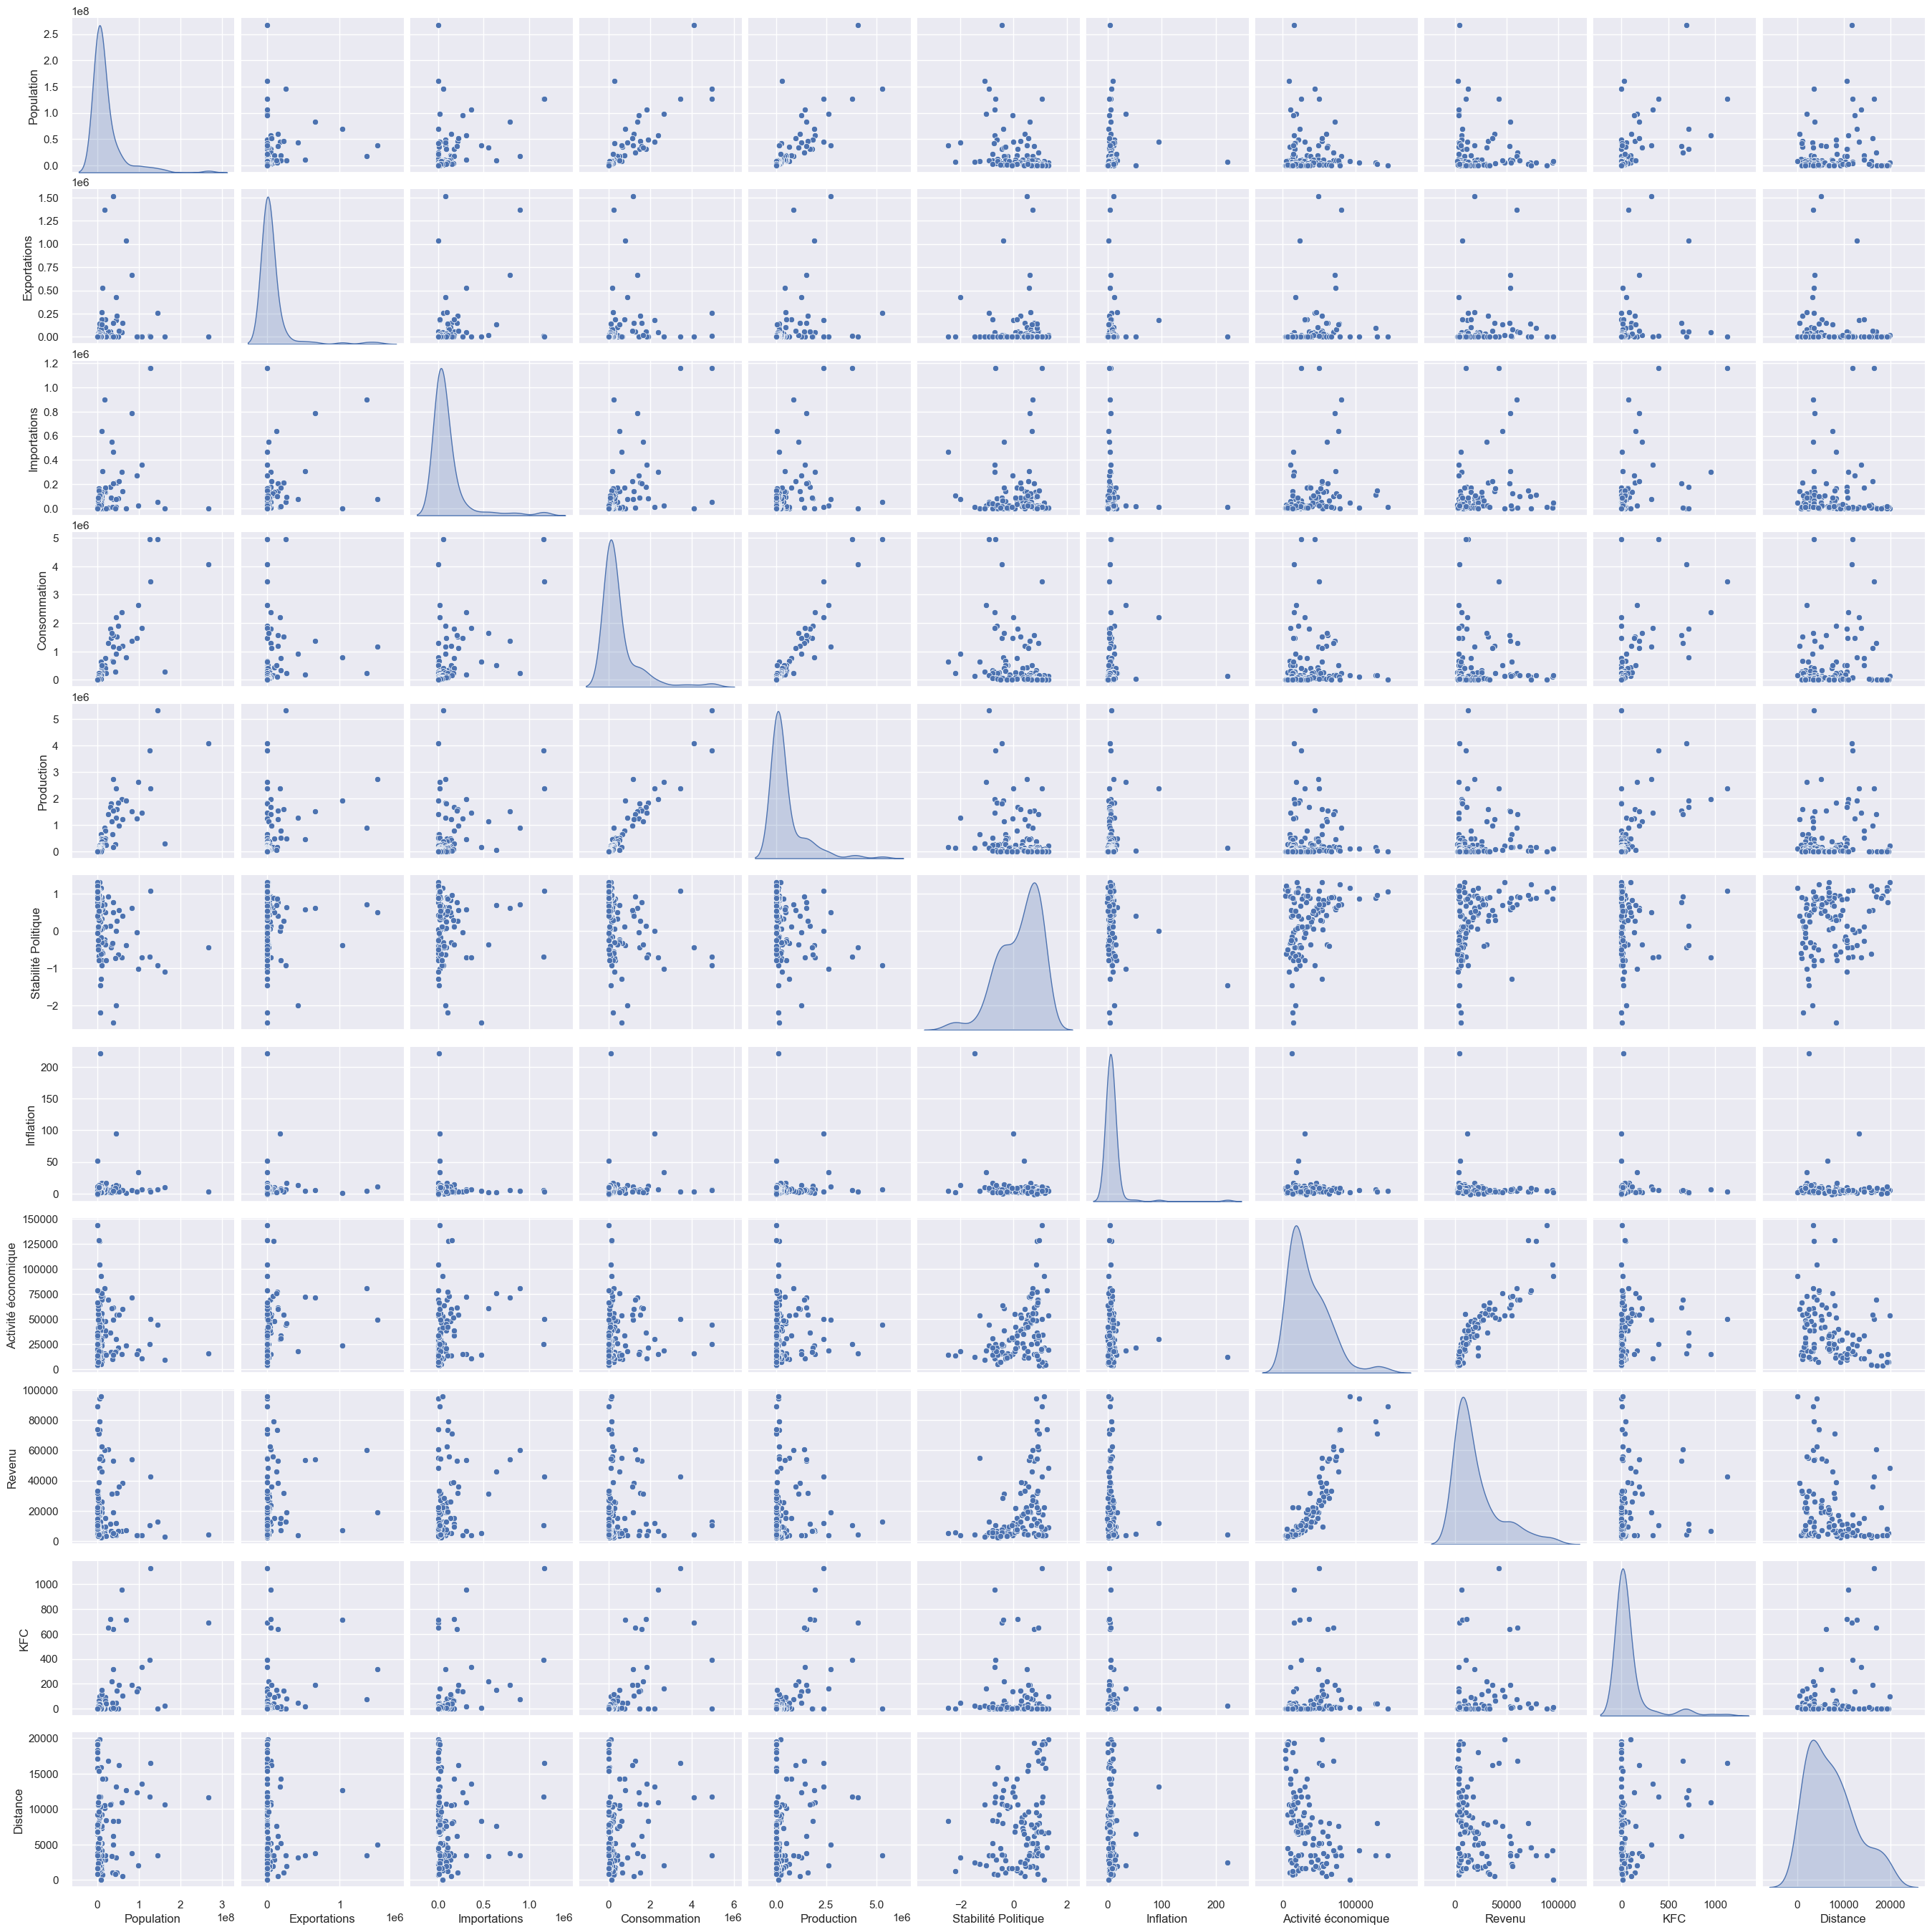

In [11]:
# Relation entre les variables quantitatives
sns.pairplot(df_num, diag_kind='kde')

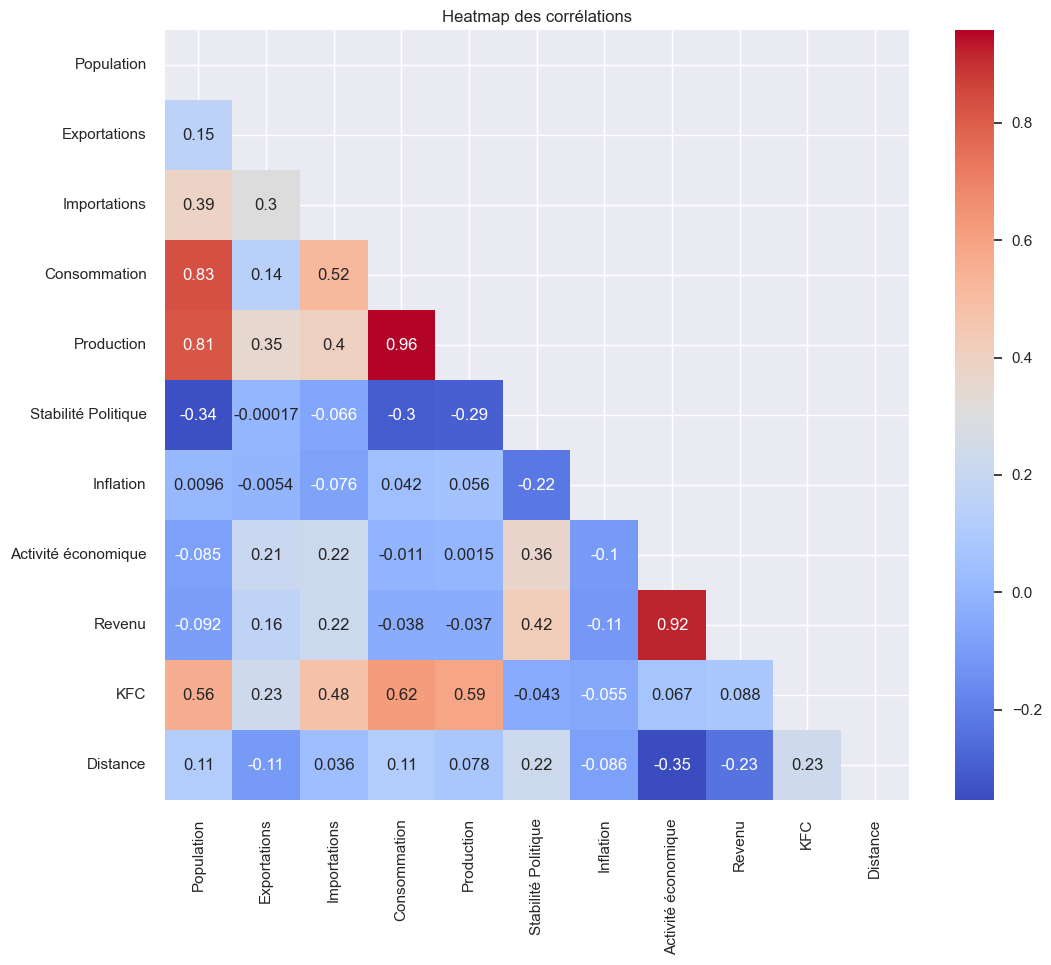

In [12]:
# Tableau des corrélations
correlation = df_num.corr()

# Heatmap des corrélations
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask)
plt.title("Heatmap des corrélations")
plt.show()

Les corrélations à noter :
- Production/Consommation
- Population/Production
- Population/Consommation
- Revenu/Activité économique

Dans une moindre importance :
- Consommation/KFC

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 2 - Analyse en Composantes Principales

***

### 2.1 - Séparation des données

In [13]:
Pays = df.index
Region = df.Region.values
SubRegion = df['Sub-region'].values
df_acp = df.drop(columns=['Region', 'Sub-region'])
X = df_acp.values
Indicateurs = df_acp.columns

### 2.2 - Scaling

In [14]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 3.22748242,  0.83138795, -0.23552291,  4.81127627,  5.34535968,
        -1.46962524, -0.09947588,  0.30621708, -0.35393097, -0.40003014,
        -0.74307271],
       [ 6.36966195, -0.3182657 , -0.49299104,  3.86306331,  3.9837204 ,
        -0.85435749, -0.23643265, -0.75480529, -0.7310754 ,  3.13972284,
         0.83945642],
       [ 2.72387277, -0.28707355,  5.24062605,  4.80802896,  3.66915394,
        -1.17480944, -0.15230079, -0.38754132, -0.44901322,  1.61901619,
         0.85341136],
       [ 0.44926551,  6.41923941, -0.10678885,  0.72400216,  2.48424988,
         0.35054185,  0.11945252,  0.49909818, -0.0673194 ,  1.21828944,
        -0.45544586],
       [ 2.00834057, -0.30935366, -0.39396483,  2.30976926,  2.36420331,
        -1.6106241 ,  1.13183854, -0.63988733, -0.75291247,  0.44252354,
        -1.03457593]])

In [15]:
# On espère avoir une moyenne à 0 et un écart-type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx,:]

0    1    2    3    4    5    6    7    8    9    10
mean -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

### 2.3 - ACP

In [16]:
# Instanciation sur l'ensemble des variables
pca = PCA()

# On l'entraine sur les données scalées
coord = pca.fit_transform(X_scaled)

# Nombre de composantes calculées
n_comp = pca.n_components_
n_comp

11

### 2.4 - Variance expliquée

In [17]:
# Valeurs corrigées
eigval = (n_comp-1)/n_comp*pca.explained_variance_
# Variance expliquée
scree = np.round(pca.explained_variance_ratio_*100, decimals=1)
# Cumul de variance expliquée
scree_cum = np.cumsum(scree)
# Liste des composantes
c_list = ["F"+str(i) for i in range(1,n_comp+1)]

In [18]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        'Dimension': c_list,
        'Valeurs propres': pca.explained_variance_,
        'Valeurs propres corrigées': eigval,
        'Proportion de variance': scree,
        'Proportion de variance cumulée': scree_cum
    },
    columns=['Dimension', 'Valeurs propres', 'Valeurs propres corrigées', 'Proportion de variance', 'Proportion de variance cumulée']
)
comp

Dimension  Valeurs propres  Valeurs propres corrigées  \
0         F1         3.758449                   3.416772   
1         F2         2.452492                   2.229538   
2         F3         1.403261                   1.275692   
3         F4         0.885702                   0.805184   
4         F5         0.881624                   0.801476   
5         F6         0.639473                   0.581339   
6         F7         0.426146                   0.387406   
7         F8         0.363233                   0.330212   
8         F9         0.210725                   0.191568   
9        F10         0.071764                   0.065240   
10       F11         0.001149                   0.001045   

    Proportion de variance  Proportion de variance cumulée  
0                     33.9                            33.9  
1                     22.1                            56.0  
2                     12.6                            68.6  
3                      8.0                            76.6  
4                      7.9                            84.5  
5                      5.8                            90.3  
6                      3.8                            94.1  
7                      3.3                            97.4  
8                      1.9                            99.3  
9                      0.6                            99.9  
10                     0.0                            99.9

La 1ère composante capte 34% de la variance de données, la 2ème 22%,...

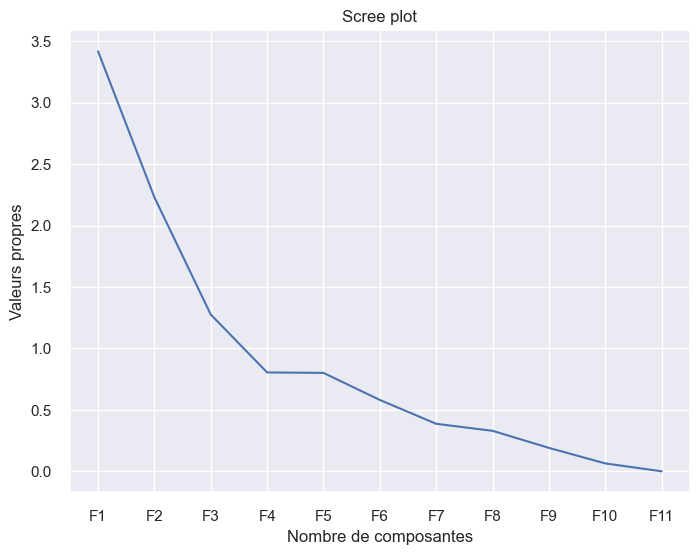

In [19]:
# Scree plot
plt.figure(figsize=(8,6))
plt.plot(c_list, eigval)
plt.title("Scree plot")
plt.xlabel("Nombre de composantes")
plt.ylabel("Valeurs propres")
plt.show()

On observe une cassure au niveau de la composante F4.

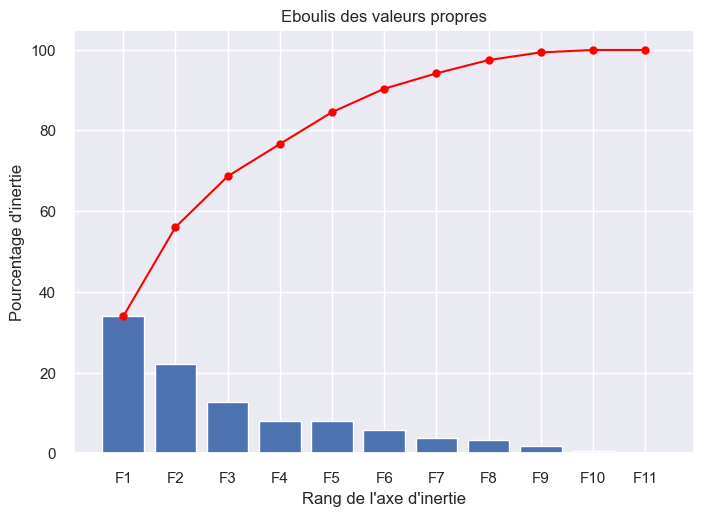

In [20]:
# Eboulis des valeurs propres
plt.bar(c_list, scree)
plt.plot(c_list, scree_cum, c="red", marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

En bleu est présenté la variance de chaque nouvelle composante, et en rouge la variance cumulée.

Près de **80%** de la variance est comprise dans les 4 premières composantes. 

In [21]:
# ACP à 4 composantes
n_comp = 4
c_list = ["F"+str(i) for i in range(1,n_comp+1)]
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

### 2.5 - Components

In [22]:
# Calcul du cosinus carré des variables
cos_squared = np.round(np.square(pca.components_), 4)

# Création d'un DataFrame avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=Indicateurs, index=c_list)
df_cos_squared

Population  Exportations  Importations  Consommation  Production  \
F1      0.2064        0.0316        0.1019        0.2395      0.2331   
F2      0.0060        0.0472        0.0462        0.0007      0.0002   
F3      0.0002        0.0222        0.0030        0.0000      0.0036   
F4      0.0185        0.5936        0.0236        0.0392      0.0008   

    Stabilité Politique  Inflation  Activité économique  Revenu     KFC  \
F1               0.0313     0.0002               0.0000  0.0002  0.1507   
F2               0.1142     0.0225               0.3615  0.3573  0.0080   
F3               0.2417     0.1867               0.0184  0.0013  0.0556   
F4               0.0103     0.2041               0.0373  0.0601  0.0035   

    Distance  
F1    0.0049  
F2    0.0363  
F3    0.4673  
F4    0.0090

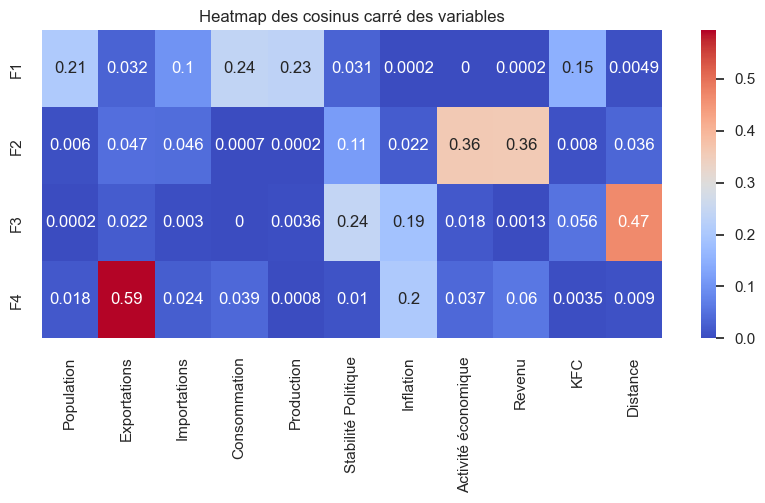

In [23]:
# Heatmap des cosinus carré
plt.figure(figsize=(10,4))
sns.heatmap(df_cos_squared, annot=True, cmap='coolwarm')
plt.title("Heatmap des cosinus carré des variables")
plt.show()

In [24]:
pcs = pca.components_
pcs = pd.DataFrame(pcs, columns=Indicateurs, index=c_list)
pcs

Population  Exportations  Importations  Consommation  Production  \
F1    0.454366      0.177724      0.319275      0.489347    0.482833   
F2   -0.077281      0.217274      0.214883     -0.026631   -0.012360   
F3   -0.012829     -0.148986      0.054581     -0.006863   -0.060243   
F4   -0.135906      0.770431      0.153764     -0.198040   -0.028759   

    Stabilité Politique  Inflation  Activité économique    Revenu       KFC  \
F1            -0.176899   0.014955            -0.005197 -0.015787  0.388241   
F2             0.337932  -0.149895             0.601275  0.597713  0.089713   
F3             0.491632  -0.432108            -0.135545 -0.036211  0.235796   
F4            -0.101719  -0.451739            -0.193129 -0.245146 -0.059083   

    Distance  
F1  0.070125  
F2 -0.190462  
F3  0.683579  
F4 -0.094736

<Axes: >

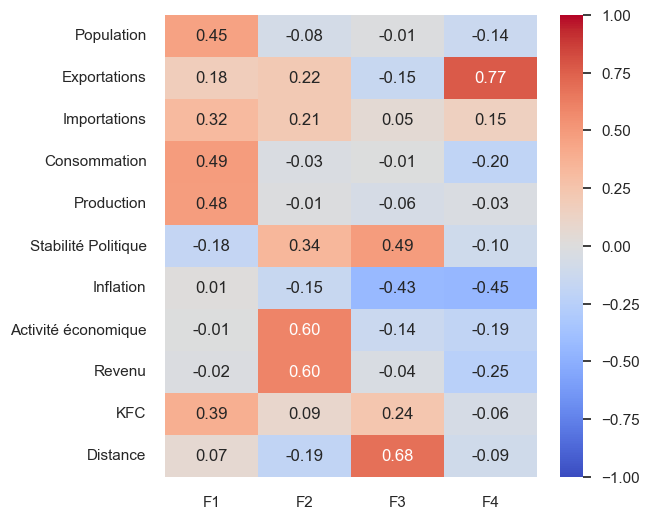

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt="0.2f")

### 2.6 - Cercles des corrélations

In [26]:
def correlation_graph(pca,
                      x_y,
                      features):
    """Affiche le cercle des corrélations
    Arguments:
    ----------
    pca : sklearn.decomposition.PCA, notre objet PCA qui a été fit
    x_y : list ou tuple, le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple, la liste des features à représenter
    """

    # Extrait x et y
    x,y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante
    for i in range(0, pca.components_.shape[1]):

        # Affichage des flèches
        ax.arrow(0,0, # Start the arrow at the origin)
                pca.components_[x, i], #0 for PC1
                pca.components_[y, i], #1 for PC2
                head_width=0.07,
                head_length=0.07,
                width=0.02)
        
        # Affichage des noms de variables
        plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{}, {}%)".format(x+1, y+1, round(100*(pca.explained_variance_ratio_[x]+pca.explained_variance_ratio_[y]),1)))

    # Cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scale

    # Axes et affichage
    plt.axis('equal')
    plt.show(block=False)

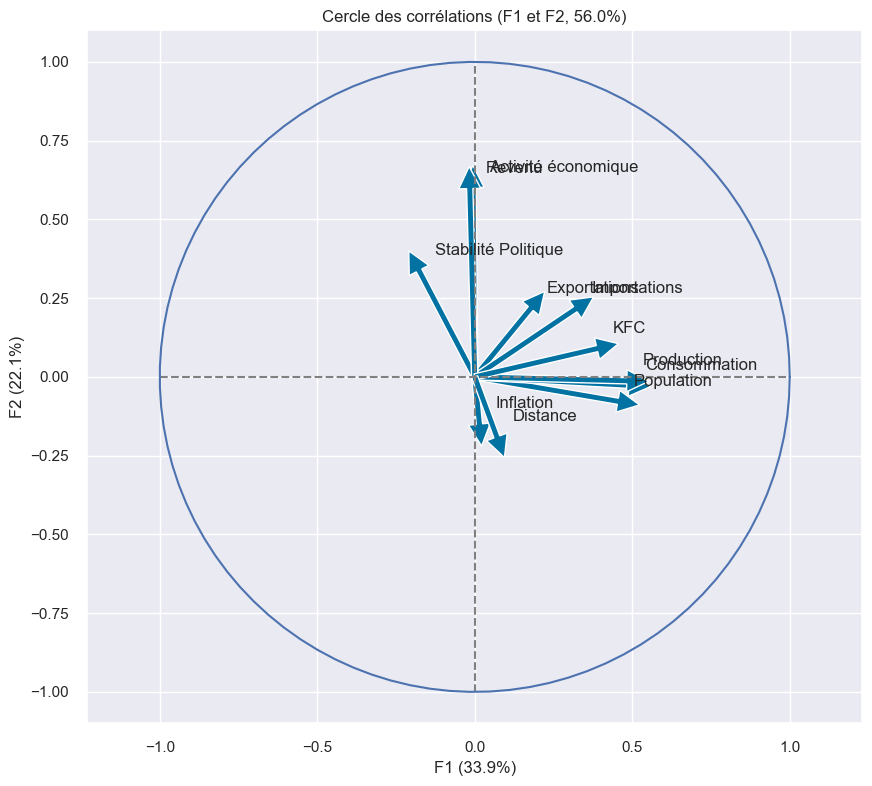

In [27]:
correlation_graph(pca, (0,1), Indicateurs)

Les variables les plus corrélées positivement à F1 sont :
- Consommation
- Production
- Population
- KFC

Les variables les plus corrélées positivement à F2 sont :
- Revenu
- Activité économique

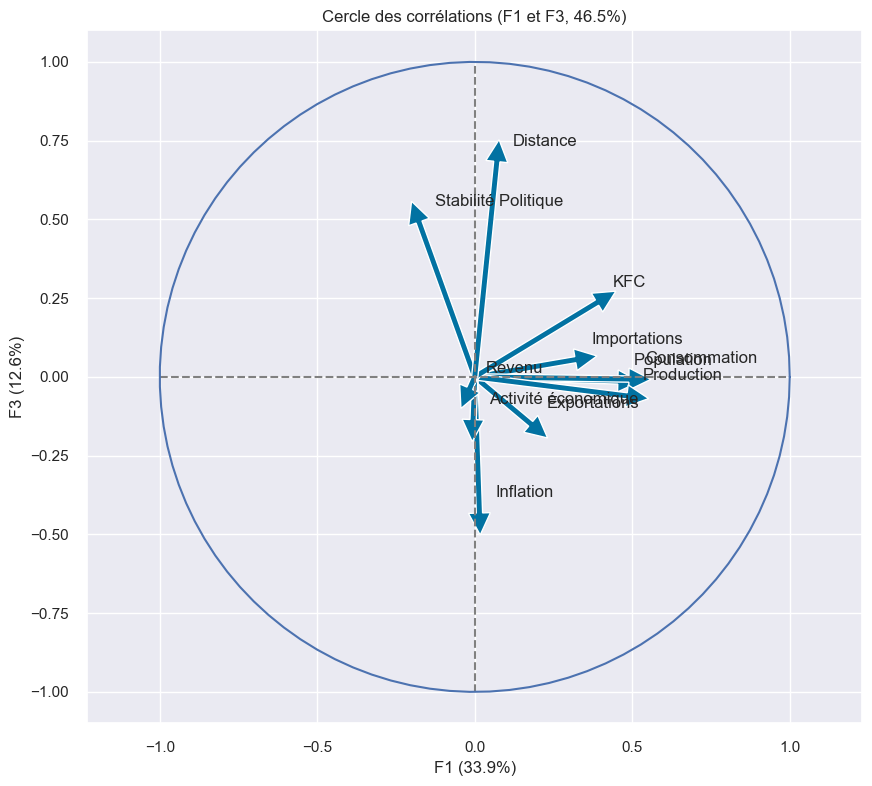

In [28]:
correlation_graph(pca, (0,2), Indicateurs)

Corrélations positives à F3 :
- Distance
- Stabilité politique

Corrélation négative à F3 :
- Inflation

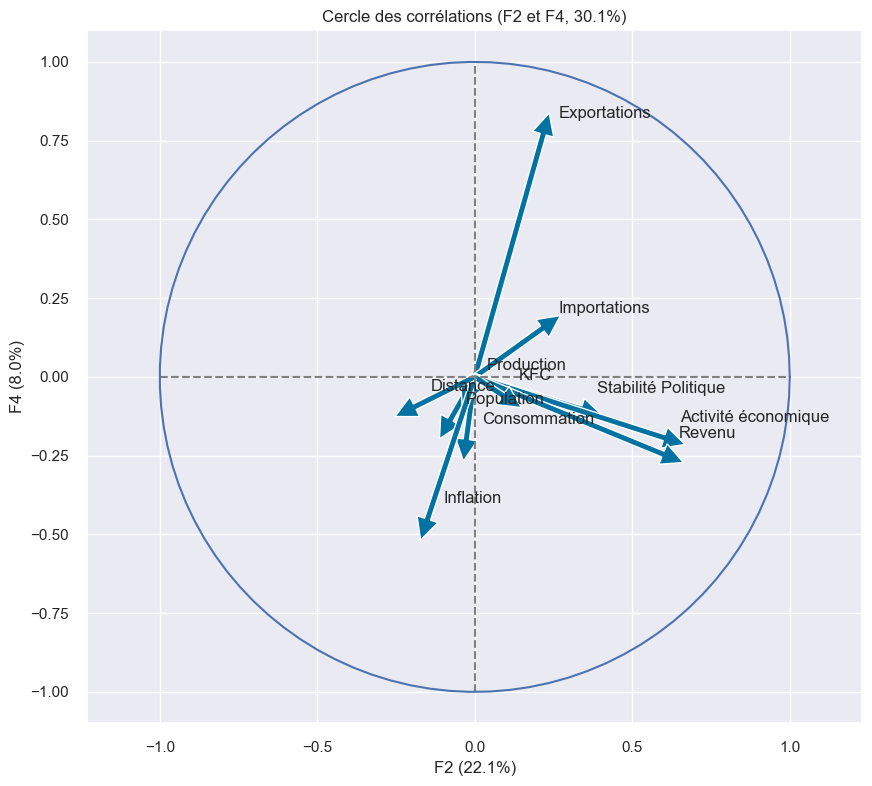

In [29]:
correlation_graph(pca, (1,3), Indicateurs)

Corrélations positives à F4 :
- Exportations

Corrélation négative à F4 :
- Inflation

### 2.7 - Projections des individus

In [30]:
def display_factorial_planes(X_projected,
                             x_y,
                             pca=None,
                             labels=None,
                             clusters=None,
                             alpha=1,
                             figsize=[10,8],
                             marker="."):
    """Affiche le nuage des individus dans les plans factoriels
    Arguments:
    ----------
    X_projected : numpy.array, les individus projetés
    x_y : list ou tuple, le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    pca : sklearn.decomposition.PCA, notre objet PCA qui a été fit
    labels : list, les labels à afficher
    clusters : list, les clusters à afficher
    alpha : float, la transparence des points
    figsize : list, la taille de l'image
    marker : str, la forme des points
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été définie
    if not figsize:
        figsize = [7,6]

    # On gère les labels
    if labels is None:
        labels = []
    try:
        len(labels)
    except Exception as e:
        raise e
    
    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("La variable axis n'est pas bonne")
    
    # On définit x et y
    x,y = x_y

    # On crée la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters
    c = None if clusters is None else clusters

    # On affiche les points
    if c is None:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100)
    else:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette='viridis')

    # Si la variable pca a été fournie, on peut calculer le % de la variance de chaque axe
    if pca:
        v1 = str(round(100*pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ""

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels
    if len(labels):
        for i,(_x, _y) in enumerate(X_[:, [x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='16', ha='center', va='center')

    # Titre et affichage
    plt.title(f"Projection des individus (F{x+1} et F{y+1})")
    plt.show()

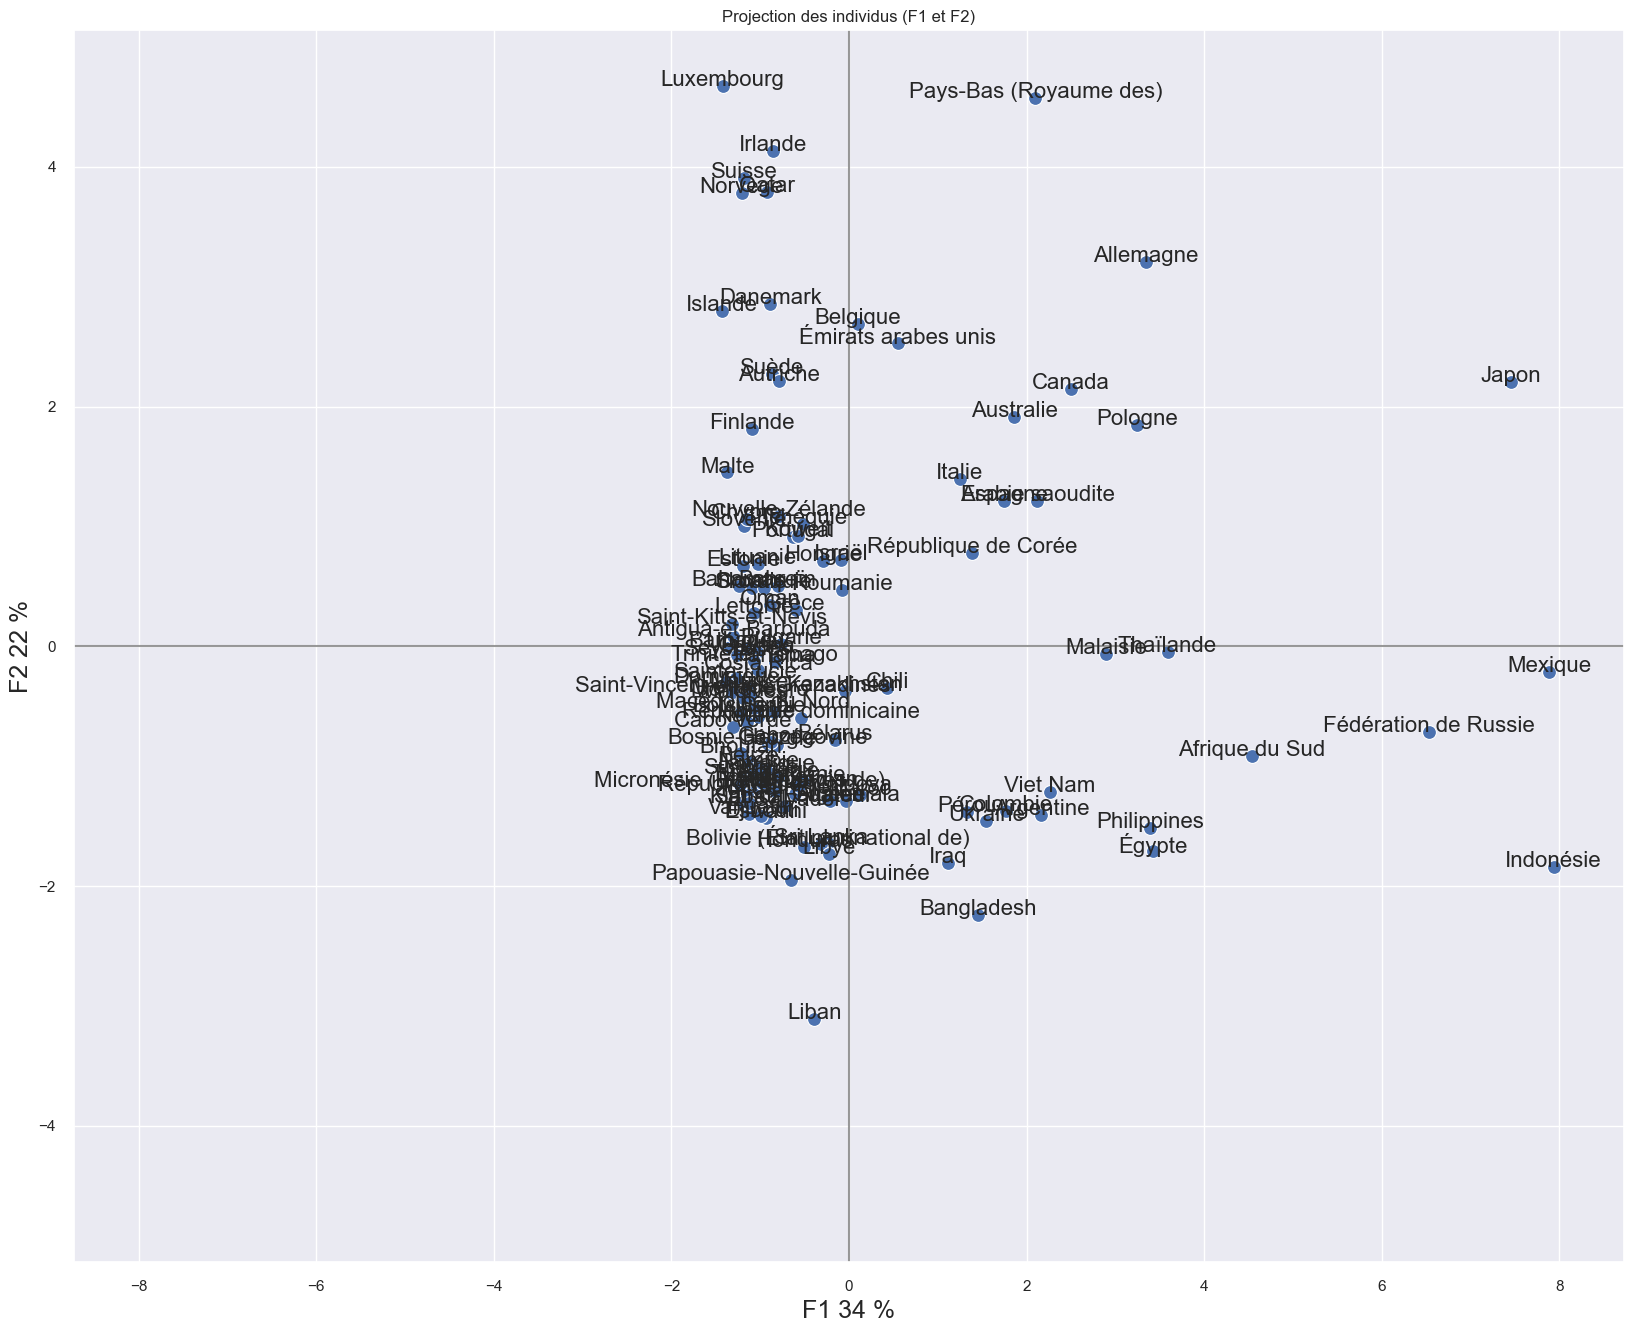

In [31]:
X_proj = pca.transform(X_scaled)
display_factorial_planes(X_proj, (0,1), pca=pca, labels=Pays, figsize=(20,16), marker="o")

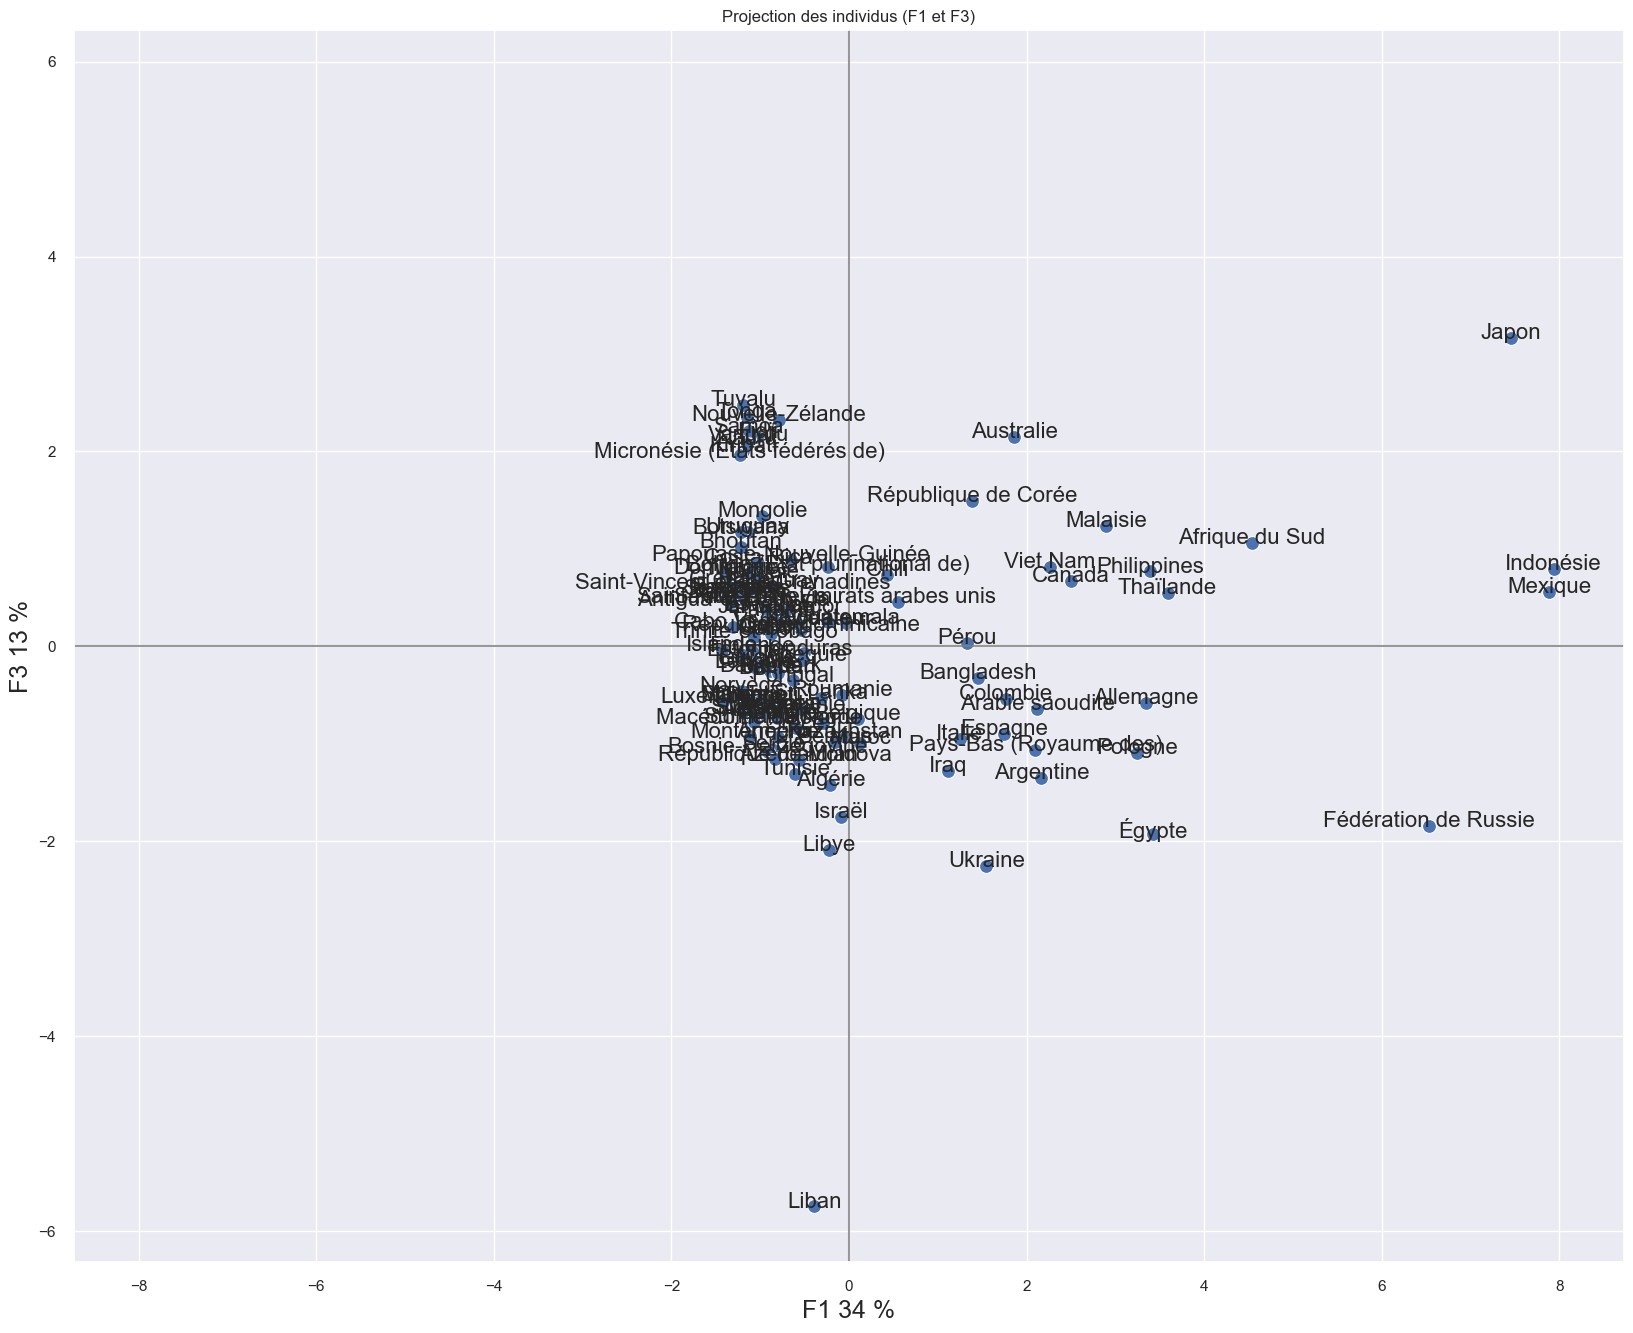

In [32]:
display_factorial_planes(X_proj, (0,2), pca=pca, labels=Pays, figsize=(20,16), marker="o")

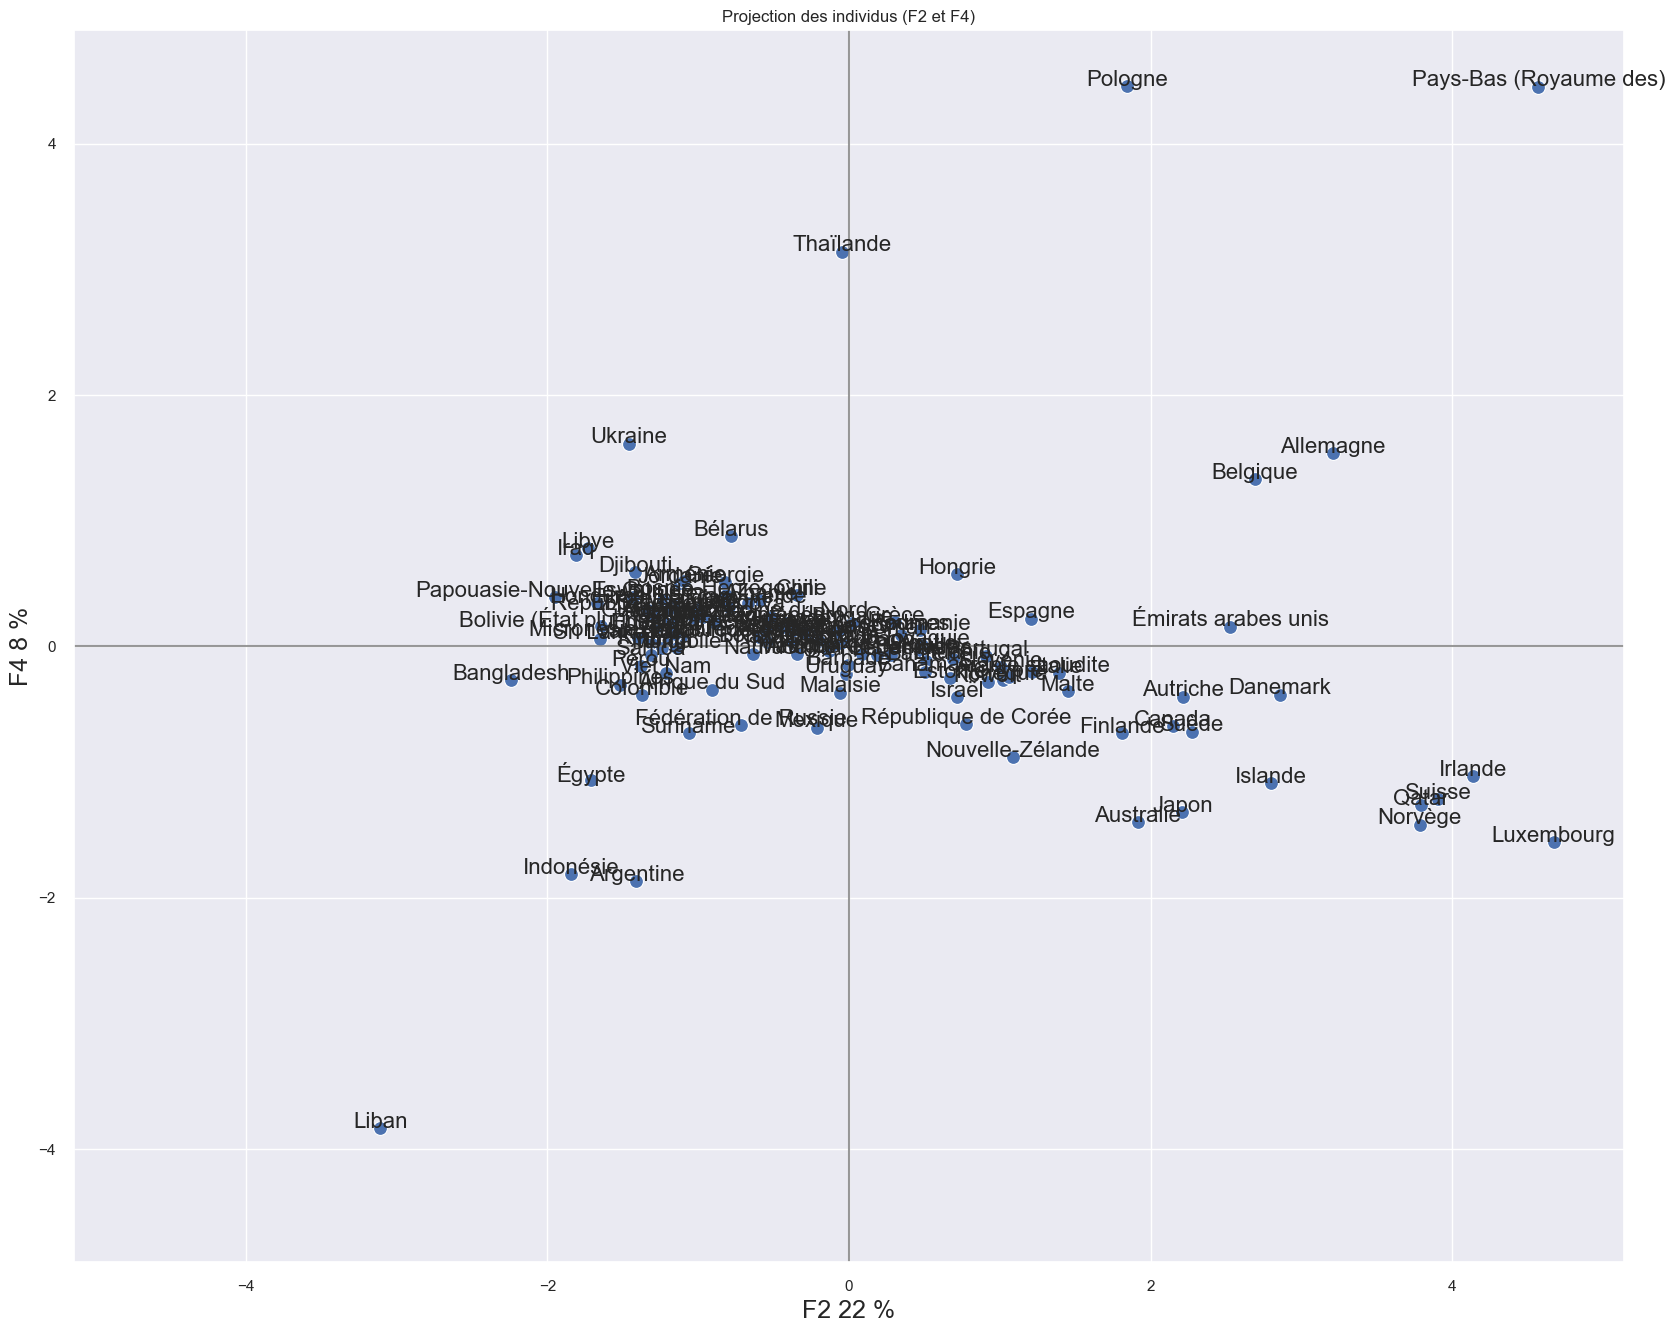

In [33]:
display_factorial_planes(X_proj, (1,3), pca=pca, labels=Pays, figsize=(20,16), marker="o")

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 3 - Classification ascendante hiérarchique

***

### 3.1 - Préparation des données pour le clustering

In [34]:
X = df_acp.values
# Instanciation
scaler = StandardScaler()
# Transformation
X_scaled = scaler.fit_transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, method='ward', metric='euclidean')

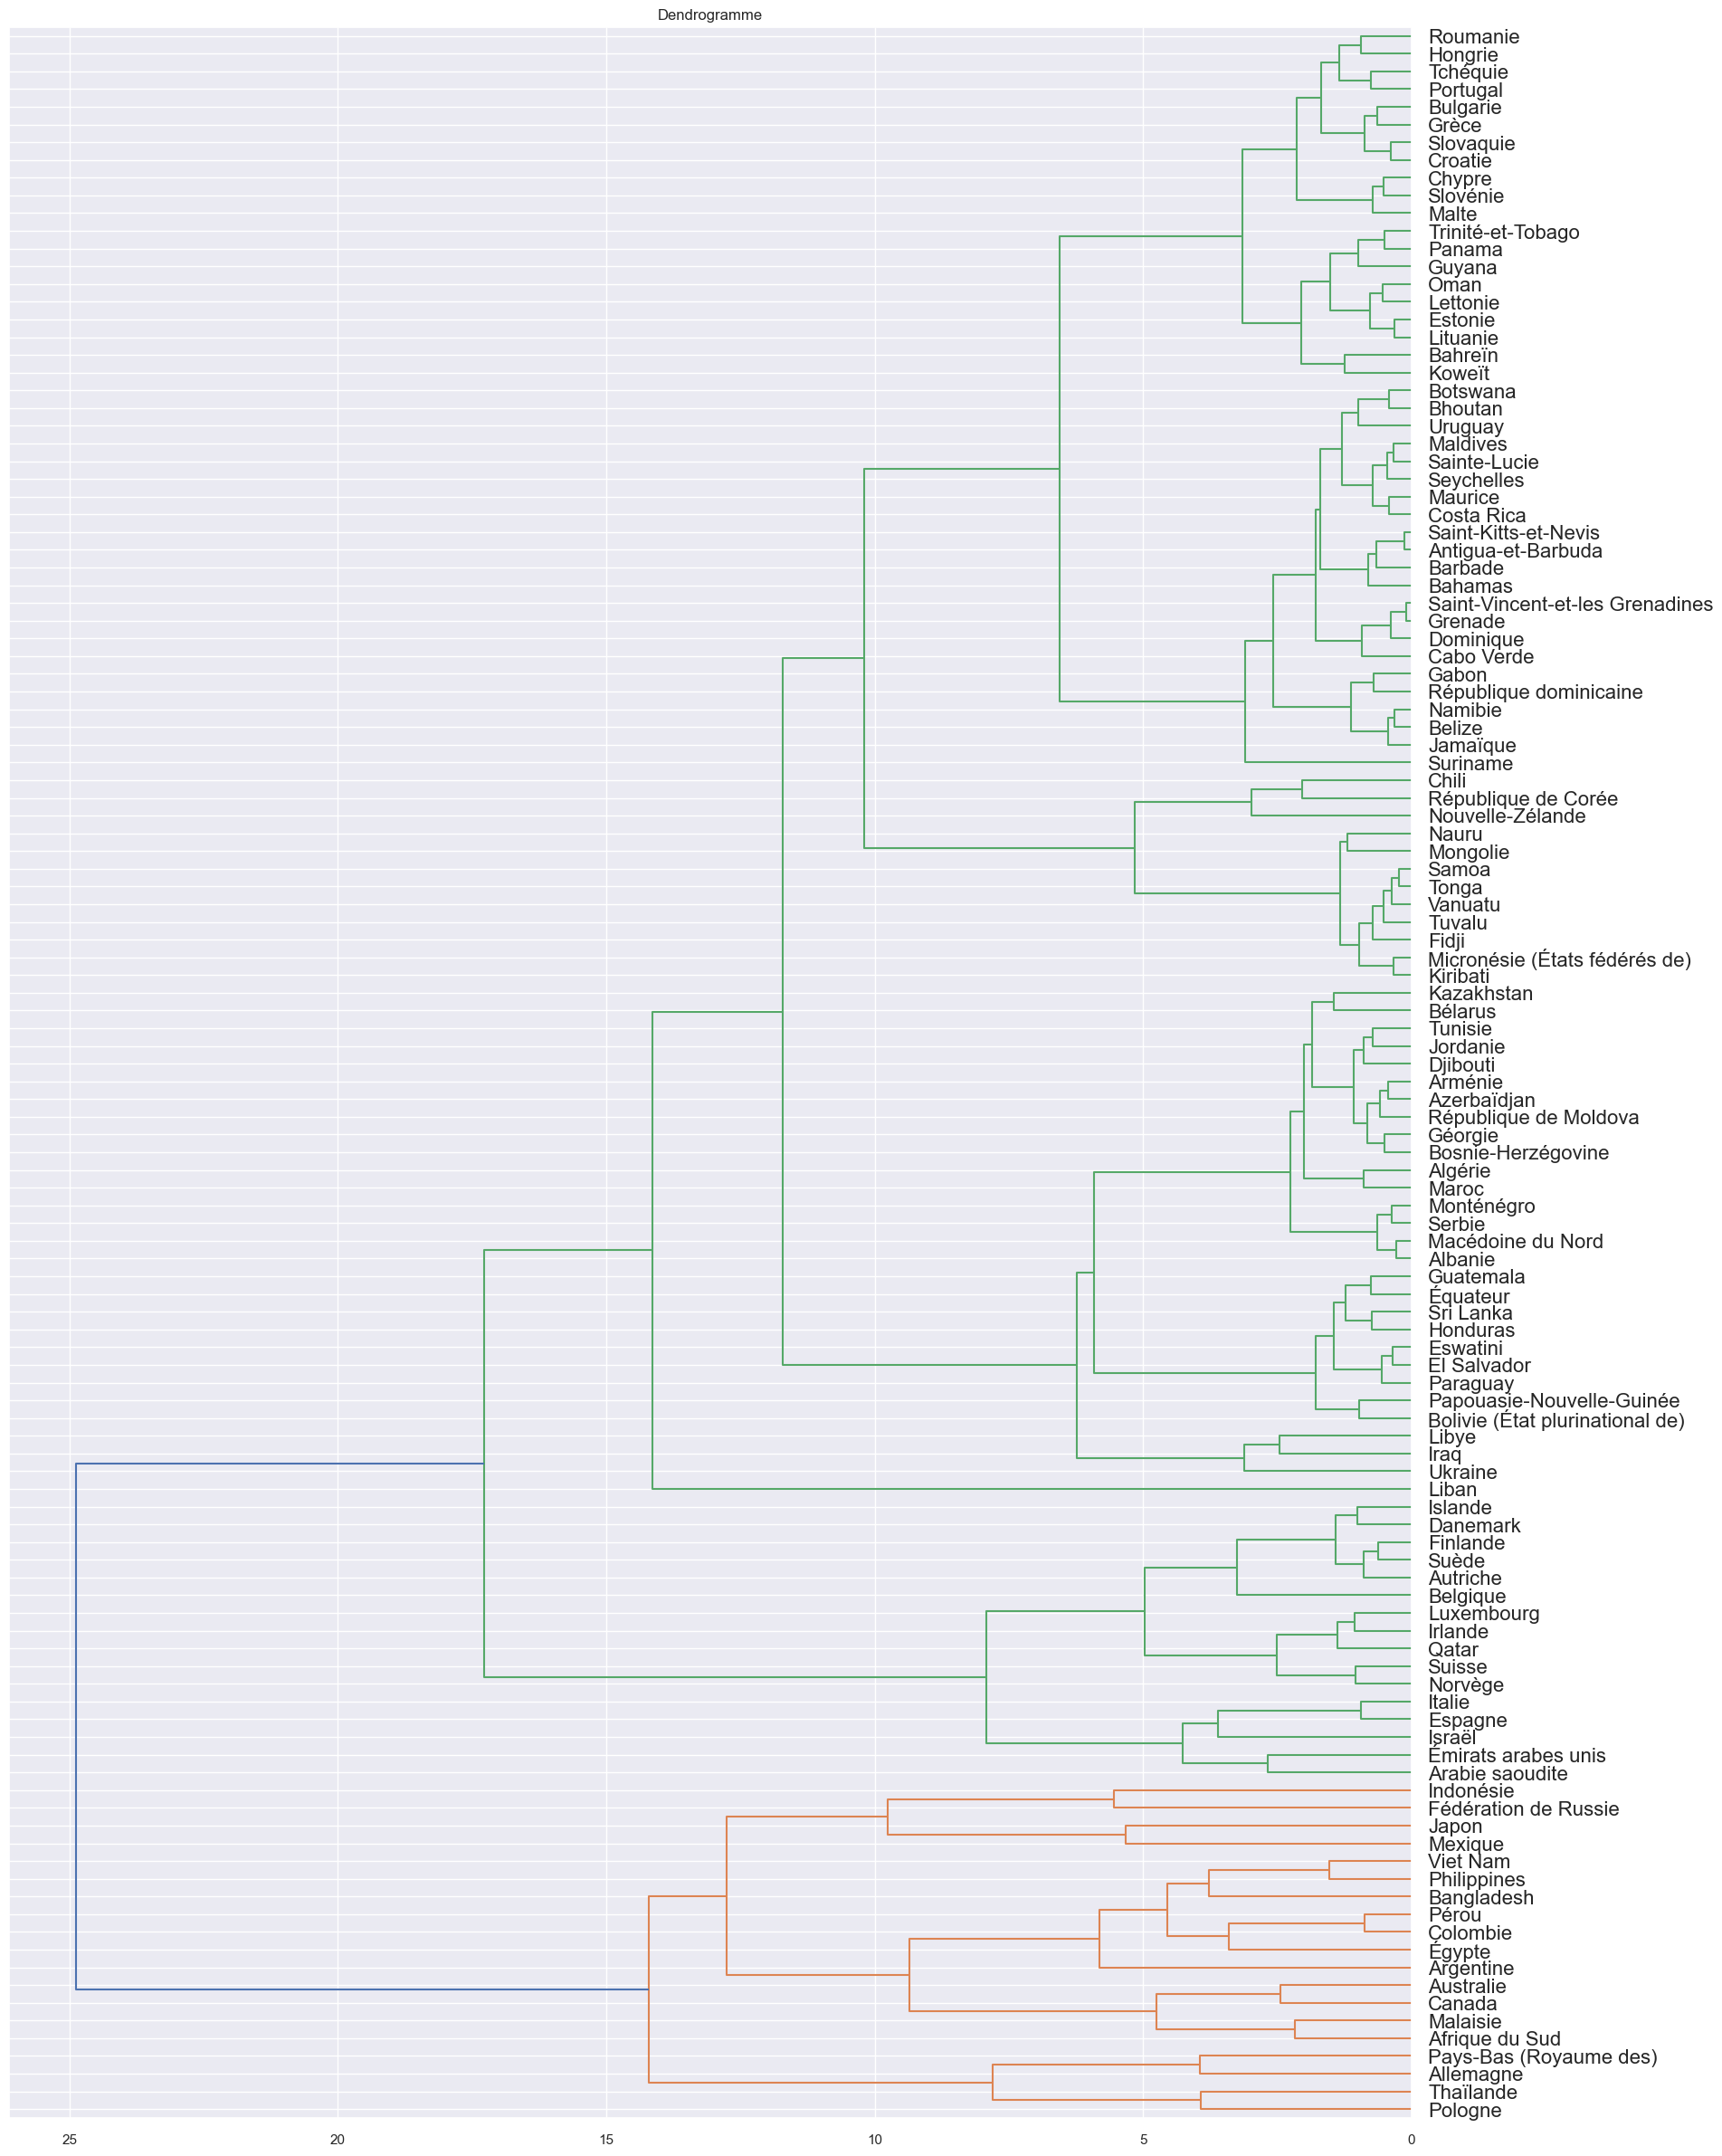

In [35]:
def plot_dendrogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(20, 30))
    dn = dendrogram(Z, ax=ax, labels=names, orientation="left", leaf_font_size=16)
    plt.title("Dendrogramme")
    plt.show()

plot_dendrogram(Z, Pays)

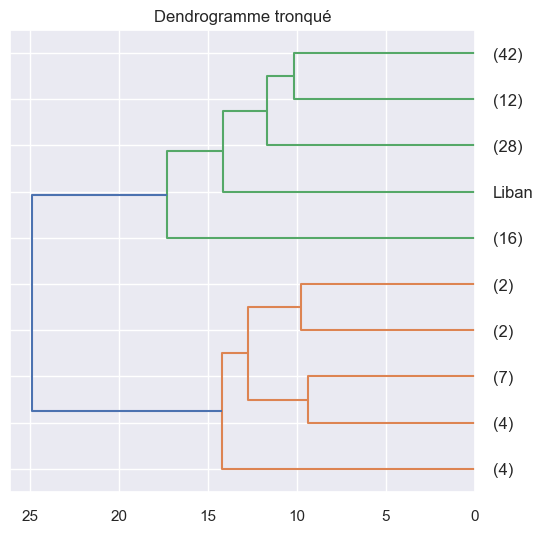

In [36]:
# Dendrogramme tronqué
fig, ax = plt.subplots(figsize=(6, 6))
dn = dendrogram(Z, ax=ax, labels=Pays, orientation="left", truncate_mode='lastp', p=10)
plt.title("Dendrogramme tronqué")
plt.show()

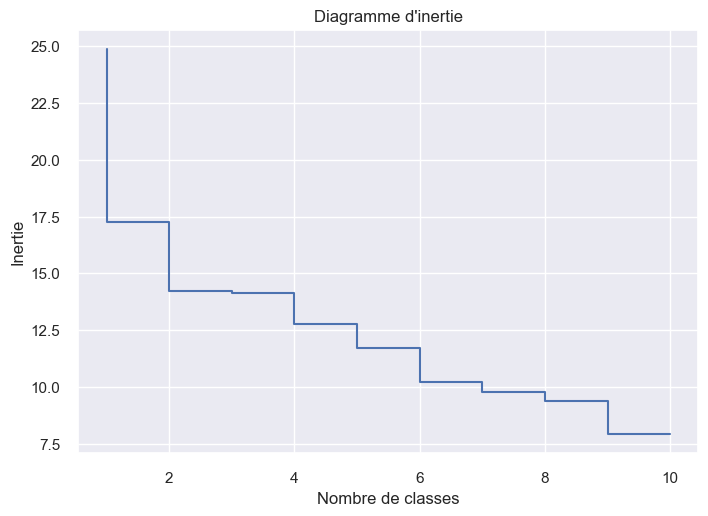

In [37]:
# Diagramme d'inertie pour définir le nombre optimal de clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.step(idxs, last_rev)
plt.title("Diagramme d'inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
plt.show()

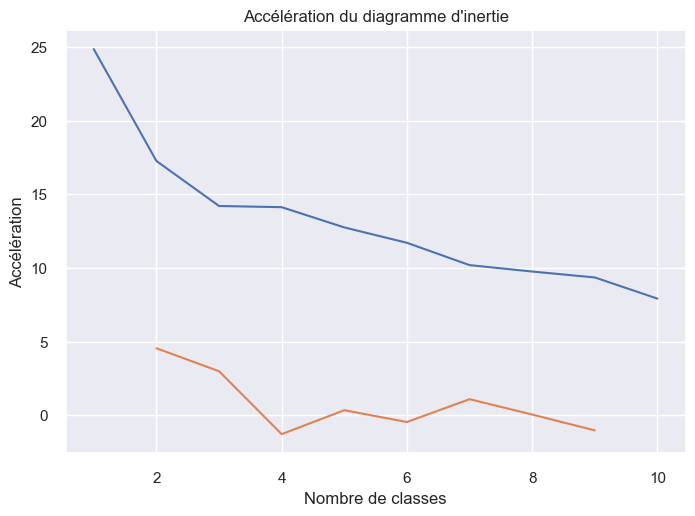

In [38]:
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title("Accélération du diagramme d'inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Accélération")
plt.show()

In [39]:
k = acceleration_rev.argmax() + 2
print(f"Le nombre optimal de classe est {k}.")

Le nombre optimal de classe est 2.


In [40]:
# Découpage en clusters
classes = fcluster(Z, k, criterion='maxclust')
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [41]:
# Création d'un DataFrame avec les clusters
df_classes = pd.DataFrame(classes, index=Pays, columns=['Classe'])
df_classes

Classe
Pays                        
Fédération de Russie       1
Indonésie                  1
Mexique                    1
Pologne                    1
Égypte                     1
...                      ...
Cabo Verde                 2
Luxembourg                 2
Djibouti                   2
Mongolie                   2
Nauru                      2

[118 rows x 1 columns]

In [42]:
# Nombre de pays par cluster
df_classes['Classe'].value_counts()

Classe
2    99
1    19
Name: count, dtype: int64

In [43]:
# Dataframe des pays de la classe 1
df_classe_1 = df_classes[df_classes['Classe'] == 1]

### 3.2 - Projection des individus avec clusters

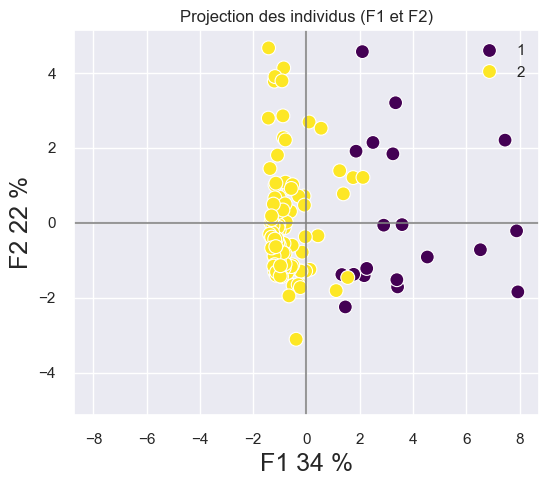

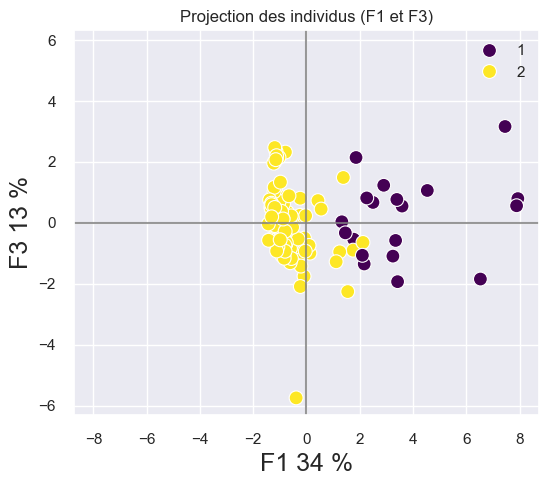

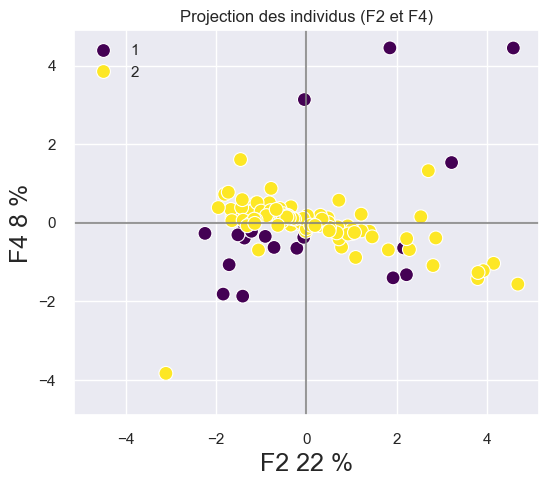

In [44]:
X_proj = pca.transform(X_scaled)

display_factorial_planes(X_proj, (0,1), pca=pca, clusters=classes, figsize=(6,5), marker="o")
display_factorial_planes(X_proj, (0,2), pca=pca, clusters=classes, figsize=(6,5), marker="o")
display_factorial_planes(X_proj, (1,3), pca=pca, clusters=classes, figsize=(6,5), marker="o")

### 3.3 - Etude des classes

In [45]:
# Mise à l'échelle des données
df_scaled = pd.DataFrame(X_scaled, index=Pays, columns=Indicateurs)
df_scaled.head()

Population  Exportations  Importations  Consommation  \
Pays                                                                         
Fédération de Russie    3.227482      0.831388     -0.235523      4.811276   
Indonésie               6.369662     -0.318266     -0.492991      3.863063   
Mexique                 2.723873     -0.287074      5.240626      4.808029   
Pologne                 0.449266      6.419239     -0.106789      0.724002   
Égypte                  2.008341     -0.309354     -0.393965      2.309769   

                      Production  Stabilité Politique  Inflation  \
Pays                                                               
Fédération de Russie    5.345360            -1.469625  -0.099476   
Indonésie               3.983720            -0.854357  -0.236433   
Mexique                 3.669154            -1.174809  -0.152301   
Pologne                 2.484250             0.350542   0.119453   
Égypte                  2.364203            -1.610624   1.131839   

                      Activité économique    Revenu       KFC  Distance  
Pays                                                                     
Fédération de Russie             0.306217 -0.353931 -0.400030 -0.743073  
Indonésie                       -0.754805 -0.731075  3.139723  0.839456  
Mexique                         -0.387541 -0.449013  1.619016  0.853411  
Pologne                          0.499098 -0.067319  1.218289 -0.455446  
Égypte                          -0.639887 -0.752912  0.442524 -1.034576

In [46]:
df_scaled_classes = pd.concat([df_scaled, df_classes], axis=1)
df_scaled_classes.head()

Population  Exportations  Importations  Consommation  \
Pays                                                                         
Fédération de Russie    3.227482      0.831388     -0.235523      4.811276   
Indonésie               6.369662     -0.318266     -0.492991      3.863063   
Mexique                 2.723873     -0.287074      5.240626      4.808029   
Pologne                 0.449266      6.419239     -0.106789      0.724002   
Égypte                  2.008341     -0.309354     -0.393965      2.309769   

                      Production  Stabilité Politique  Inflation  \
Pays                                                               
Fédération de Russie    5.345360            -1.469625  -0.099476   
Indonésie               3.983720            -0.854357  -0.236433   
Mexique                 3.669154            -1.174809  -0.152301   
Pologne                 2.484250             0.350542   0.119453   
Égypte                  2.364203            -1.610624   1.131839   

                      Activité économique    Revenu       KFC  Distance  \
Pays                                                                      
Fédération de Russie             0.306217 -0.353931 -0.400030 -0.743073   
Indonésie                       -0.754805 -0.731075  3.139723  0.839456   
Mexique                         -0.387541 -0.449013  1.619016  0.853411   
Pologne                          0.499098 -0.067319  1.218289 -0.455446   
Égypte                          -0.639887 -0.752912  0.442524 -1.034576   

                      Classe  
Pays                          
Fédération de Russie       1  
Indonésie                  1  
Mexique                    1  
Pologne                    1  
Égypte                     1

In [47]:
# Moyenne de chaque classe
df_scaled_classes_mean = df_scaled_classes.groupby('Classe').mean()
df_scaled_classes_mean.head()

Population  Exportations  Importations  Consommation  Production  \
Classe                                                                     
1         1.660575      0.934111      0.982499      1.720640    1.829727   
2        -0.318696     -0.179274     -0.188560     -0.330224   -0.351160   

        Stabilité Politique  Inflation  Activité économique    Revenu  \
Classe                                                                  
1                 -0.450251   0.135380            -0.031620 -0.019263   
2                  0.086412  -0.025982             0.006068  0.003697   

             KFC  Distance  
Classe                      
1       1.528974  0.448198  
2      -0.293440 -0.086018

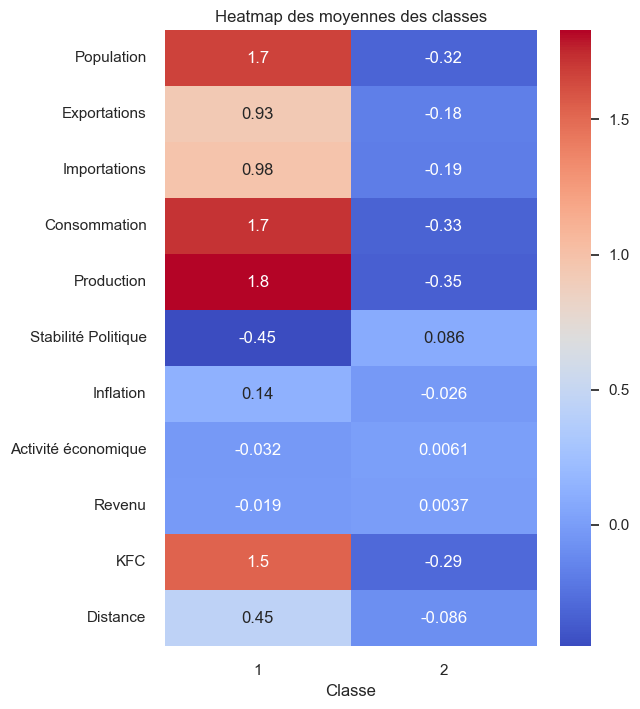

In [48]:
# Heatmap des moyennes des classes
plt.figure(figsize=(6,8))
sns.heatmap(df_scaled_classes_mean.T, annot=True, cmap='coolwarm')
plt.title("Heatmap des moyennes des classes")
plt.show()

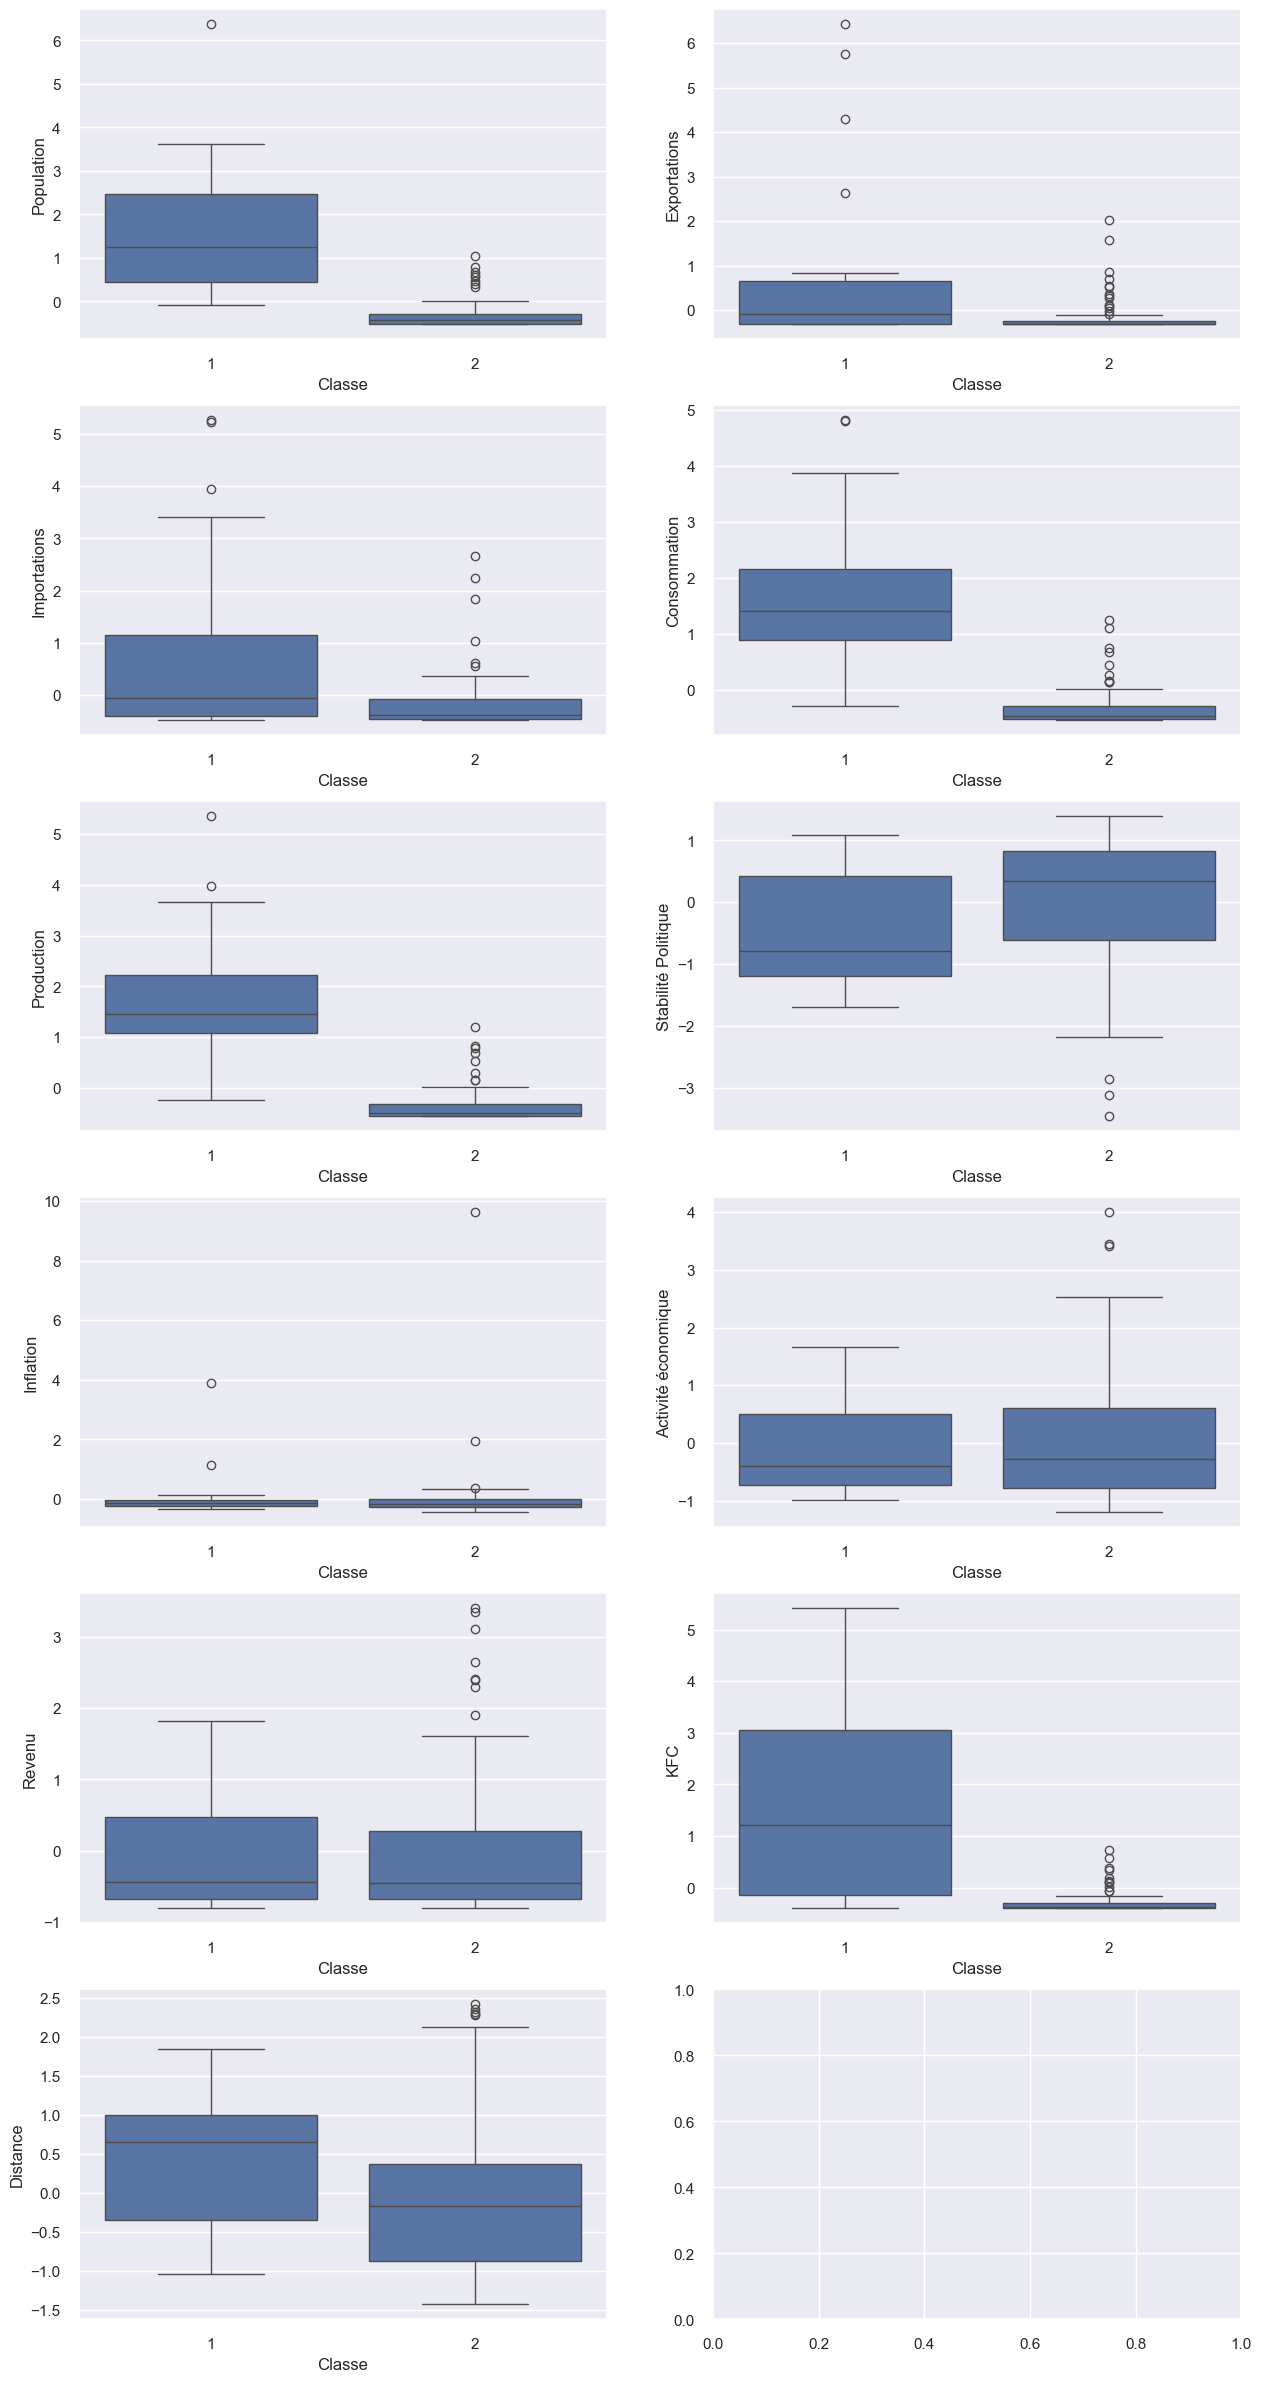

In [49]:
# Distribution des classes
fig, ax = plt.subplots(6, 2, figsize=(15, 30))

for i in range(6):
    for j in range(2):
        if i == 5 and j == 1:
            break
        else:
            sns.boxplot(x='Classe', y=Indicateurs[i*2+j], data=df_scaled_classes, ax=ax[i, j])

plt.show()

A partir de ces premiers résultats, nous pouvons retenir la classe 1.

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 4 - K-Means

***

### 4.1 - Méthode du coude

In [50]:
# Récupération des données réduites
Y = X_scaled

# Instanciation de l'estimateur
kmeans = KMeans(n_clusters=4)
# Apprentissage
kmeans.fit(Y)
# Calcul de l'inertie
kmeans.inertia_

725.2954345104695

In [51]:
inertia = []
k_list = range(1, 11)
list(k_list)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke l'inertie intraclasse
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia.append(kmeans.inertia_)

inertia

[1298.0,
 976.0271694144581,
 820.9725727713471,
 824.2408904018862,
 698.7983566215826,
 561.7312617984797,
 591.2476319684715,
 454.94133809015227,
 385.05476795409254,
 341.21205354891407]

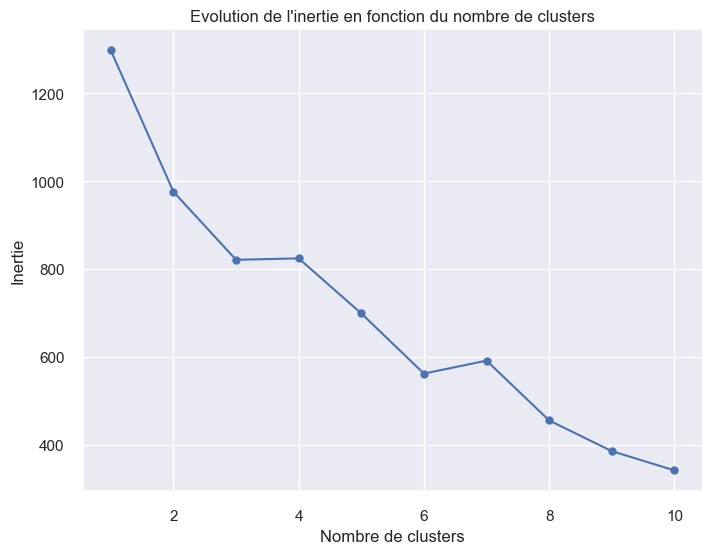

In [52]:
# Affichage du résultat
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(k_list, inertia, marker='o')
ax.set_xlabel('Nombre de clusters')
ax.set_ylabel("Inertie")
ax.set_title("Evolution de l'inertie en fonction du nombre de clusters")
plt.show()

Nous avons une 1ère cassure avec 2 clusters.

### 4.2 - Score de silhouette

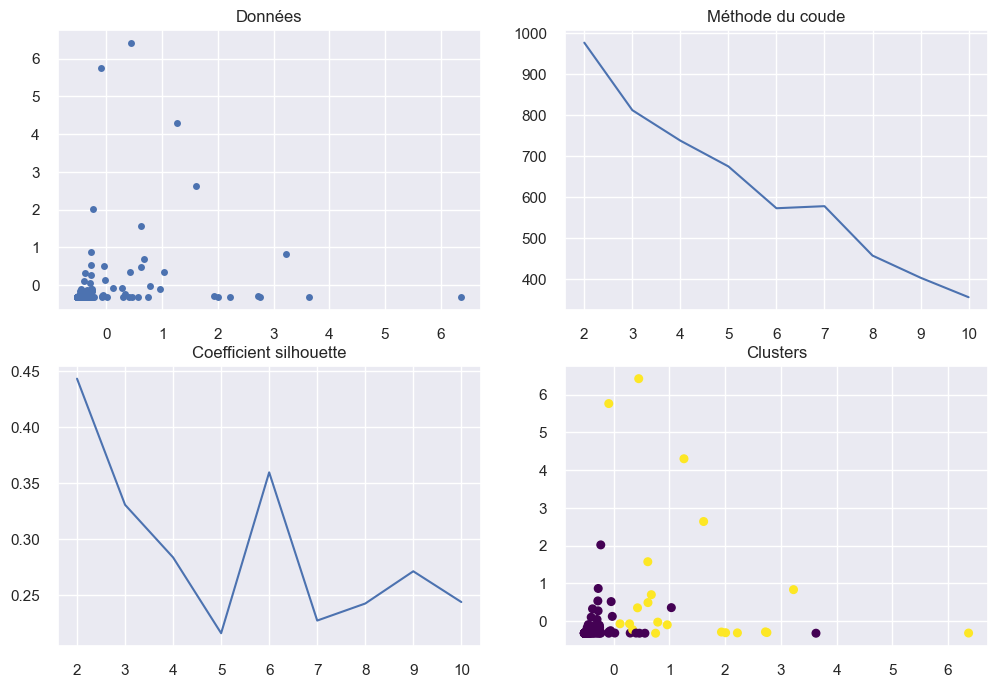

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
canvas = FigureCanvas(fig)
fig.set_size_inches(12, 8)

ax1.cla()
ax1.plot(Y[:, 0], Y[:, 1], "o", markersize=5)
ax1.set_title('Données')

wcss = []
tab_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
    tab_silhouette.append(silhouette_score(Y, kmeans.labels_))

ax2.cla()
ax2.plot(range(2, 11), wcss)
ax2.set_title('Méthode du coude')

ax3.cla()
ax3.plot(range(2, 11), tab_silhouette)
ax3.set_title('Coefficient silhouette')

kmeans = KMeans(n_clusters=np.argmax(tab_silhouette)+2)
pred_y = kmeans.fit_predict(Y)
ax4.cla()
ax4.scatter(Y[:, 0], Y[:, 1], c=pred_y, cmap='viridis', s=30)
ax4.set_title('Clusters')

canvas.draw()

Le coefficient de silhouette le plus haut se retrouve aussi avec 2 clusters.

### 4.3 - Projection des clusters

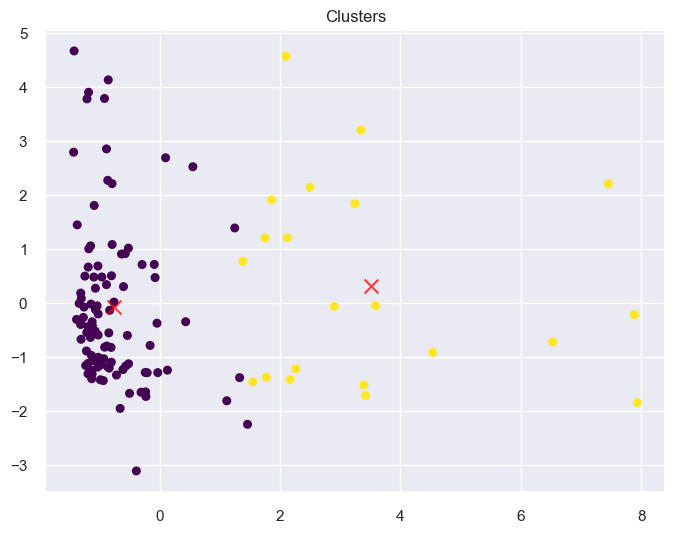

In [54]:

pca = PCA(n_components=2).fit(Y)
Y_projected = pca.transform(Y)
centers = pca.transform(kmeans.cluster_centers_)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Y_projected[:, 0], Y_projected[:, 1], c=pred_y, s=30, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='x')
ax.set_title("Clusters")
plt.show()

### 4.4 - Etude des clusters

In [55]:
# Mise à l'échelle des données
df_kmeans_scaled = pd.DataFrame(Y, index=Pays, columns=Indicateurs)
df_kmeans_scaled.head()

Population  Exportations  Importations  Consommation  \
Pays                                                                         
Fédération de Russie    3.227482      0.831388     -0.235523      4.811276   
Indonésie               6.369662     -0.318266     -0.492991      3.863063   
Mexique                 2.723873     -0.287074      5.240626      4.808029   
Pologne                 0.449266      6.419239     -0.106789      0.724002   
Égypte                  2.008341     -0.309354     -0.393965      2.309769   

                      Production  Stabilité Politique  Inflation  \
Pays                                                               
Fédération de Russie    5.345360            -1.469625  -0.099476   
Indonésie               3.983720            -0.854357  -0.236433   
Mexique                 3.669154            -1.174809  -0.152301   
Pologne                 2.484250             0.350542   0.119453   
Égypte                  2.364203            -1.610624   1.131839   

                      Activité économique    Revenu       KFC  Distance  
Pays                                                                     
Fédération de Russie             0.306217 -0.353931 -0.400030 -0.743073  
Indonésie                       -0.754805 -0.731075  3.139723  0.839456  
Mexique                         -0.387541 -0.449013  1.619016  0.853411  
Pologne                          0.499098 -0.067319  1.218289 -0.455446  
Égypte                          -0.639887 -0.752912  0.442524 -1.034576

In [56]:
# Regroupement des clusters modifiés
df_kmeans_clusters = pd.concat([df_kmeans_scaled, pd.DataFrame(pred_y, index=Pays, columns=['Cluster'])], axis=1)
df_kmeans_clusters.head()

Population  Exportations  Importations  Consommation  \
Pays                                                                         
Fédération de Russie    3.227482      0.831388     -0.235523      4.811276   
Indonésie               6.369662     -0.318266     -0.492991      3.863063   
Mexique                 2.723873     -0.287074      5.240626      4.808029   
Pologne                 0.449266      6.419239     -0.106789      0.724002   
Égypte                  2.008341     -0.309354     -0.393965      2.309769   

                      Production  Stabilité Politique  Inflation  \
Pays                                                               
Fédération de Russie    5.345360            -1.469625  -0.099476   
Indonésie               3.983720            -0.854357  -0.236433   
Mexique                 3.669154            -1.174809  -0.152301   
Pologne                 2.484250             0.350542   0.119453   
Égypte                  2.364203            -1.610624   1.131839   

                      Activité économique    Revenu       KFC  Distance  \
Pays                                                                      
Fédération de Russie             0.306217 -0.353931 -0.400030 -0.743073   
Indonésie                       -0.754805 -0.731075  3.139723  0.839456   
Mexique                         -0.387541 -0.449013  1.619016  0.853411   
Pologne                          0.499098 -0.067319  1.218289 -0.455446   
Égypte                          -0.639887 -0.752912  0.442524 -1.034576   

                      Cluster  
Pays                           
Fédération de Russie        1  
Indonésie                   1  
Mexique                     1  
Pologne                     1  
Égypte                      1

In [57]:
df_kmeans_clusters['Cluster'].value_counts()

Cluster
0    97
1    21
Name: count, dtype: int64

In [58]:
# Moyenne de chaque cluster
df_kmeans_clusters_mean = df_kmeans_clusters.groupby('Cluster').mean()
df_kmeans_clusters_mean.head()

Population  Exportations  Importations  Consommation  Production  \
Cluster                                                                     
0         -0.309719     -0.210311     -0.232256     -0.364314   -0.379667   
1          1.430607      0.971434      1.072802      1.682782    1.753702   

         Stabilité Politique  Inflation  Activité économique    Revenu  \
Cluster                                                                  
0                   0.094048  -0.021002            -0.027758 -0.020737   
1                  -0.434413   0.097008             0.128215  0.095787   

              KFC  Distance  
Cluster                      
0       -0.321696 -0.063209  
1        1.485930  0.291965

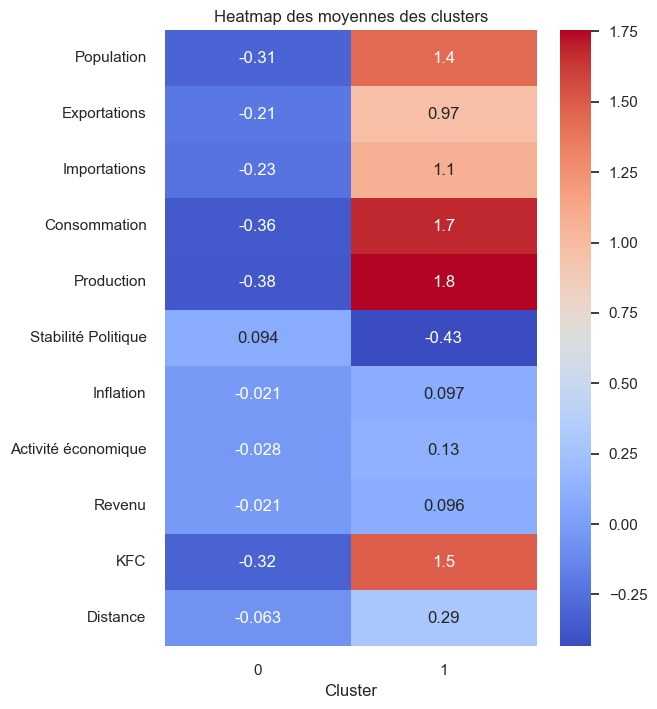

In [59]:
# Heatmap des moyennes des clusters
plt.figure(figsize=(6,8))
sns.heatmap(df_kmeans_clusters_mean.T, annot=True, cmap='coolwarm')
plt.title("Heatmap des moyennes des clusters")
plt.show()

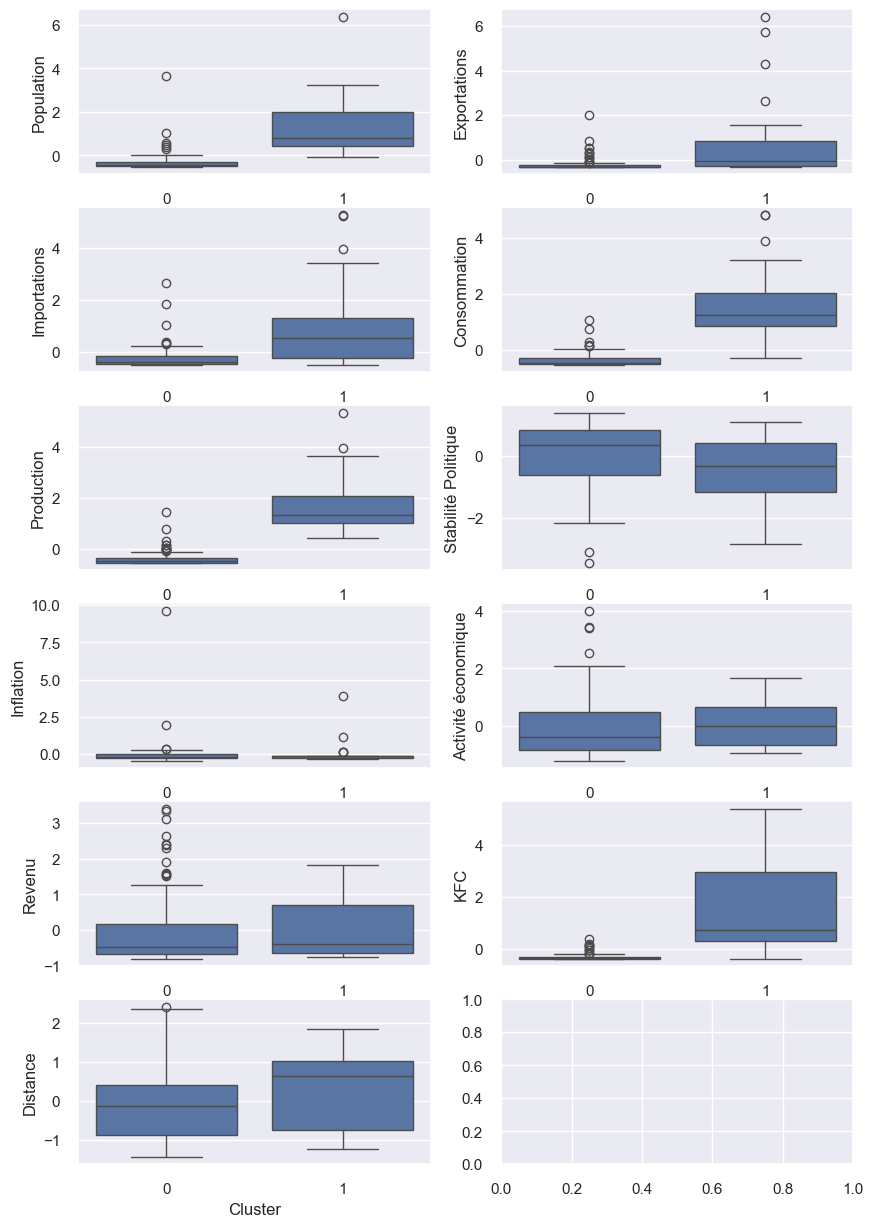

In [60]:
# Distribution des clusters
fig, ax = plt.subplots(6, 2, figsize=(10, 15))

for i in range(6):
    for j in range(2):
        if i == 5 and j == 1:
            break
        else:
            sns.boxplot(x='Cluster', y=Indicateurs[i*2+j], data=df_kmeans_clusters, ax=ax[i, j])

plt.show()

In [61]:
df_cluster_1 = df_kmeans_clusters[df_kmeans_clusters['Cluster'] == 1]
df_cluster_1

Population  Exportations  Importations  Consommation  \
Pays                                                                           
Fédération de Russie      3.227482      0.831388     -0.235523      4.811276   
Indonésie                 6.369662     -0.318266     -0.492991      3.863063   
Mexique                   2.723873     -0.287074      5.240626      4.808029   
Pologne                   0.449266      6.419239     -0.106789      0.724002   
Égypte                    2.008341     -0.309354     -0.393965      2.309769   
Japon                     2.749936     -0.304898      5.265383      3.193036   
Argentine                 0.615206      0.488274     -0.423673      1.823756   
Afrique du Sud            0.961319     -0.099921      1.012207      2.015347   
Thaïlande                 1.261165      4.298173     -0.483088      0.315924   
Colombie                  0.751779     -0.322722     -0.091935      1.507685   
Malaisie                  0.284510     -0.073184      0.383391      1.399442   
Espagne                   0.675292      0.697707      0.556687      1.102854   
Canada                    0.427438      0.350138      0.526979      1.163471   
Allemagne                 1.614096      2.636077      3.413593      0.939407   
Philippines               2.220362     -0.313810      1.289481      1.417843   
Australie                 0.113665     -0.073184     -0.473186      0.840905   
Ukraine                   0.612243      1.571088     -0.101838      0.432827   
Viet Nam                  1.934187     -0.291530      0.843863      1.038991   
Arabie saoudite           0.340550     -0.229145      2.235181      1.245736   
République de Corée       0.790707     -0.028624      0.616102      0.673128   
Pays-Bas (Royaume des)   -0.088328      5.759748      3.948334     -0.288074   

                        Production  Stabilité Politique  Inflation  \
Pays                                                                 
Fédération de Russie      5.345360            -1.469625  -0.099476   
Indonésie                 3.983720            -0.854357  -0.236433   
Mexique                   3.669154            -1.174809  -0.152301   
Pologne                   2.484250             0.350542   0.119453   
Égypte                    2.364203            -1.610624   1.131839   
Japon                     2.081872             1.081172  -0.254637   
Argentine                 2.069645            -0.303180   3.890386   
Afrique du Sud            1.621693            -1.213264  -0.127578   
Thaïlande                 1.571674            -0.777449  -0.347023   
Colombie                  1.468300            -1.110719   0.128826   
Malaisie                  1.310461            -0.110909  -0.289926   
Espagne                   1.207088             0.055726  -0.242672   
Canada                    1.147065             0.696630  -0.226974   
Allemagne                 1.120388             0.491541  -0.133350   
Philippines               1.067033            -1.200446  -0.131920   
Australie                 0.998118             0.901719  -0.149174   
Ukraine                   0.838056            -2.853978   0.179234   
Viet Nam                  0.833610            -0.328816  -0.255327   
Arabie saoudite           0.701336            -0.751813  -0.297253   
République de Corée       0.525712             0.427450  -0.239724   
Pays-Bas (Royaume des)    0.419004             0.632540  -0.228813   

                        Activité économique    Revenu       KFC  Distance  \
Pays                                                                        
Fédération de Russie               0.306217 -0.353931 -0.400030 -0.743073   
Indonésie                         -0.754805 -0.731075  3.139723  0.839456   
Mexique                           -0.387541 -0.449013  1.619016  0.853411   
Pologne                            0.499098 -0.067319  1.218289 -0.455446   
Égypte                            -0.639887 -0.752912  0.442524 -1.034576   
Japon                            

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 5 - Pays candidats

***

### 5.1 - Pays du cluster sélectionné

In [62]:
# Pays sélectionnés par le K-means
sel_pays_kmeans = df_cluster_1.index.values
sel_pays_kmeans

array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Colombie', 'Malaisie', 'Espagne', 'Canada', 'Allemagne',
       'Philippines', 'Australie', 'Ukraine', 'Viet Nam',
       'Arabie saoudite', 'République de Corée', 'Pays-Bas (Royaume des)'],
      dtype=object)

In [63]:
# Pays sélectionnés par la classification hiérarchique
sel_pays_cah = df_classe_1.index.values
sel_pays_cah

array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Colombie', 'Pérou', 'Malaisie', 'Canada', 'Allemagne',
       'Philippines', 'Australie', 'Viet Nam', 'Pays-Bas (Royaume des)',
       'Bangladesh'], dtype=object)

In [64]:
# L'ensembles des pays sélectionnés
sel_pays = pd.concat([pd.Series(sel_pays_kmeans), pd.Series(sel_pays_cah)]).unique()
sel_pays

array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Colombie', 'Malaisie', 'Espagne', 'Canada', 'Allemagne',
       'Philippines', 'Australie', 'Ukraine', 'Viet Nam',
       'Arabie saoudite', 'République de Corée', 'Pays-Bas (Royaume des)',
       'Pérou', 'Bangladesh'], dtype=object)

In [65]:
df_sel = df.loc[sel_pays]
df_sel

Region                       Sub-region  \
Pays                                                                
Fédération de Russie      Europe                   Eastern Europe   
Indonésie                   Asia               South-eastern Asia   
Mexique                 Americas  Latin America and the Caribbean   
Pologne                   Europe                   Eastern Europe   
Égypte                    Africa                  Northern Africa   
Japon                       Asia                     Eastern Asia   
Argentine               Americas  Latin America and the Caribbean   
Afrique du Sud            Africa               Sub-Saharan Africa   
Thaïlande                   Asia               South-eastern Asia   
Colombie                Americas  Latin America and the Caribbean   
Malaisie                    Asia               South-eastern Asia   
Espagne                   Europe                  Southern Europe   
Canada                  Americas                 Northern America   
Allemagne                 Europe                   Western Europe   
Philippines                 Asia               South-eastern Asia   
Australie                Oceania        Australia and New Zealand   
Ukraine                   Europe                   Eastern Europe   
Viet Nam                    Asia               South-eastern Asia   
Arabie saoudite             Asia                     Western Asia   
République de Corée         Asia                     Eastern Asia   
Pays-Bas (Royaume des)    Europe                   Western Europe   
Pérou                   Americas  Latin America and the Caribbean   
Bangladesh                  Asia                    Southern Asia   

                         Population  Exportations  Importations  Consommation  \
Pays                                                                            
Fédération de Russie    145734038.0      259000.0       52000.0     4953000.0   
Indonésie               267670543.0        1000.0           0.0     4077000.0   
Mexique                 126190788.0        8000.0     1158000.0     4950000.0   
Pologne                  37921592.0     1513000.0       78000.0     1177000.0   
Égypte                   98423598.0        3000.0       20000.0     2642000.0   
Japon                   127202192.0        4000.0     1163000.0     3458000.0   
Argentine                44361150.0      182000.0       14000.0     2193000.0   
Afrique du Sud           57792518.0       50000.0      304000.0     2370000.0   
Thaïlande                69428453.0     1037000.0        2000.0      800000.0   
Colombie                 49661048.0           0.0       81000.0     1901000.0   
Malaisie                 31528033.0       56000.0      177000.0     1801000.0   
Espagne                  46692858.0      229000.0      212000.0     1527000.0   
Canada                   37074562.0      151000.0      206000.0     1583000.0   
Allemagne                83124418.0      664000.0      789000.0     1376000.0   
Philippines             106651394.0        2000.0      360000.0     1818000.0   
Australie                24898152.0       56000.0        4000.0     1285000.0   
Ukraine                  44246156.0      425000.0       79000.0      908000.0   
Viet Nam                 95545962.0        7000.0      270000.0     1468000.0   
Arabie saoudite          33702756.0       21000.0      551000.0     1659000.0   
République de Corée      51171706.0       66000.0      224000.0     1130000.0   
Pays-Bas (Royaume des)   17059560.0     1365000.0      897000.0      242000.0   
Pérou                    31989260.0        1000.0       87000.0     1479000.0   
Bangladesh              161376708.0           0.0           0.0      284000.0   

                        Production  Stabilité Politique  Inflation  \
Pays                                                                 
Fédération de Russie     5308000.0                -0.92   6.694459   
Indonésie                4083000.0                -0.44   3.6701

In [66]:
# Nombre de pays par région
df_sel['Region'].value_counts()

Region
Asia        9
Europe      6
Americas    5
Africa      2
Oceania     1
Name: count, dtype: int64

In [67]:
# Nombre de pays par sous-région
df_sel['Sub-region'].value_counts()

Sub-region
South-eastern Asia                 5
Latin America and the Caribbean    4
Eastern Europe                     3
Eastern Asia                       2
Western Europe                     2
Northern Africa                    1
Sub-Saharan Africa                 1
Southern Europe                    1
Northern America                   1
Australia and New Zealand          1
Western Asia                       1
Southern Asia                      1
Name: count, dtype: int64

### 5.2 - Europe

In [68]:
# Observation des pays de la région Europe
df_sel[df_sel['Region'] == 'Europe']

Region       Sub-region   Population  Exportations  \
Pays                                                                         
Fédération de Russie    Europe   Eastern Europe  145734038.0      259000.0   
Pologne                 Europe   Eastern Europe   37921592.0     1513000.0   
Espagne                 Europe  Southern Europe   46692858.0      229000.0   
Allemagne               Europe   Western Europe   83124418.0      664000.0   
Ukraine                 Europe   Eastern Europe   44246156.0      425000.0   
Pays-Bas (Royaume des)  Europe   Western Europe   17059560.0     1365000.0   

                        Importations  Consommation  Production  \
Pays                                                             
Fédération de Russie         52000.0     4953000.0   5308000.0   
Pologne                      78000.0     1177000.0   2734000.0   
Espagne                     212000.0     1527000.0   1585000.0   
Allemagne                   789000.0     1376000.0   1507000.0   
Ukraine                      79000.0      908000.0   1253000.0   
Pays-Bas (Royaume des)      897000.0      242000.0    876000.0   

                        Stabilité Politique  Inflation  Activité économique  \
Pays                                                                          
Fédération de Russie                  -0.92   6.694459         44120.144531   
Pologne                                0.50  11.528913         49338.284441   
Espagne                                0.27   3.532361         54123.111397   
Allemagne                              0.61   5.946437         71438.289661   
Ukraine                               -2.00  12.849022         17630.125000   
Pays-Bas (Royaume des)                 0.72   3.838394         80760.595626   

                         Revenu    KFC  Distance  
Pays                                              
Fédération de Russie    12810.0    0.0    3530.0  
Pologne                 19110.0  315.0    5014.0  
Espagne                 32000.0  143.0    1070.0  
Allemagne               53800.0  189.0    3770.0  
Ukraine                  3930.0   48.0    3171.0  
Pays-Bas (Royaume des)  60030.0   77.0    3456.0

En dehors de la Russie et de l'Ukraine pour des raisons politiques, nous pouvons nous concentrer sur les pays ci-dessus dans un premier temps.

Soit :
- Allemagne
- Pays-Bas
- Pologne
- Espagne
- Italie

Puisse qu'ils sont proche de la France, et de plus dans l'espace Schengen, ces pays sont les candidats parfaits pour un premier test de commercialisation à l'étranger.

### 5.3 - Asie

In [69]:
# Observation des pays de la région Asie
df_sel[df_sel['Region'] == 'Asia']

Region          Sub-region   Population  Exportations  \
Pays                                                                        
Indonésie             Asia  South-eastern Asia  267670543.0        1000.0   
Japon                 Asia        Eastern Asia  127202192.0        4000.0   
Thaïlande             Asia  South-eastern Asia   69428453.0     1037000.0   
Malaisie              Asia  South-eastern Asia   31528033.0       56000.0   
Philippines           Asia  South-eastern Asia  106651394.0        2000.0   
Viet Nam              Asia  South-eastern Asia   95545962.0        7000.0   
Arabie saoudite       Asia        Western Asia   33702756.0       21000.0   
République de Corée   Asia        Eastern Asia   51171706.0       66000.0   
Bangladesh            Asia       Southern Asia  161376708.0           0.0   

                     Importations  Consommation  Production  \
Pays                                                          
Indonésie                     0.0     4077000.0   4083000.0   
Japon                   1163000.0     3458000.0   2372000.0   
Thaïlande                  2000.0      800000.0   1913000.0   
Malaisie                 177000.0     1801000.0   1678000.0   
Philippines              360000.0     1818000.0   1459000.0   
Viet Nam                 270000.0     1468000.0   1249000.0   
Arabie saoudite          551000.0     1659000.0   1130000.0   
République de Corée      224000.0     1130000.0    972000.0   
Bangladesh                    0.0      284000.0    284000.0   

                     Stabilité Politique  Inflation  Activité économique  \
Pays                                                                       
Indonésie                          -0.44   3.670131         15415.605793   
Japon                               1.07   3.268134         50105.904361   
Thaïlande                          -0.38   1.228026         23465.063135   
Malaisie                            0.14   2.488866         36416.540185   
Philippines                        -0.71   5.978025         10988.630041   
Viet Nam                           -0.03   3.252893         14973.883961   
Arabie saoudite                    -0.36   2.327085         61102.915372   
République de Corée                 0.56   3.597456         54033.159977   
Bangladesh                         -1.09   9.883503          9147.777507   

                      Revenu     KFC  Distance  
Pays                                            
Indonésie             4520.0   689.0   11695.0  
Japon                42550.0  1131.0   16455.0  
Thaïlande             7230.0   717.0   12690.0  
Malaisie             11610.0   718.0   10657.0  
Philippines           4010.0   332.0   13612.0  
Viet Nam              3960.0   136.0   12350.0  
Arabie saoudite      31120.0   220.0    3365.0  
République de Corée  36160.0   190.0   16167.0  
Bangladesh            2850.0    26.0   10613.0

Pour la zone Asie, quelques observations :
- L'Indonésie est gros producteur de volaille, avec aucune importation et peu d'exportation. Il y a trop de concurrence et sûrement peu de marché pour du poulet haut de gamme.
- D'un autre côté, le Japon est un bon candidat. Gros consommateurs, avec de forte importation, et une implantation de 1131 restaurants KFC. Ils ont également de haut niveau de revenu et un attrait pour tout ce qui est français. 
- Tous les autres pays semblent intéressants.
- A noter qu'il faudrait une viande halal pour l'Indonésie, la Malaisie, l'Arabie Saoudite, le Bangladesh.

### 5.4 - Amérique

In [70]:
# Observation des pays de la région Amérique
df_sel[df_sel['Region'] == 'Americas']

Region                       Sub-region   Population  \
Pays                                                                
Mexique    Americas  Latin America and the Caribbean  126190788.0   
Argentine  Americas  Latin America and the Caribbean   44361150.0   
Colombie   Americas  Latin America and the Caribbean   49661048.0   
Canada     Americas                 Northern America   37074562.0   
Pérou      Americas  Latin America and the Caribbean   31989260.0   

           Exportations  Importations  Consommation  Production  \
Pays                                                              
Mexique          8000.0     1158000.0     4950000.0   3800000.0   
Argentine      182000.0       14000.0     2193000.0   2361000.0   
Colombie            0.0       81000.0     1901000.0   1820000.0   
Canada         151000.0      206000.0     1583000.0   1531000.0   
Pérou            1000.0       87000.0     1479000.0   1802000.0   

           Stabilité Politique  Inflation  Activité économique   Revenu  \
Pays                                                                      
Mexique                  -0.69   5.527961         25351.440407  10720.0   
Argentine                -0.01  94.800000         30082.304525  11820.0   
Colombie                 -0.64  11.735904         21448.092568   6640.0   
Canada                    0.77   3.879002         61650.989867  53300.0   
Pérou                    -0.45   6.455613         16974.242003   6920.0   

             KFC  Distance  
Pays                        
Mexique    393.0   11767.0  
Argentine    0.0   13197.0  
Colombie     0.0    8355.0  
Canada     639.0    6159.0  
Pérou        0.0   10735.0

Ces pays sont de bons candidats en Amérique :

- Mexique
- Argentine
- Canada
- Colombie
- Pérou

### 5.5 - Afrique

In [71]:
# Observation des pays de la région Afrique
df_sel[df_sel['Region'] == 'Africa']

Region          Sub-region  Population  Exportations  \
Pays                                                                   
Égypte          Africa     Northern Africa  98423598.0        3000.0   
Afrique du Sud  Africa  Sub-Saharan Africa  57792518.0       50000.0   

                Importations  Consommation  Production  Stabilité Politique  \
Pays                                                                          
Égypte               20000.0     2642000.0   2626000.0                -1.03   
Afrique du Sud      304000.0     2370000.0   1958000.0                -0.72   

                Inflation  Activité économique  Revenu    KFC  Distance  
Pays                                                                     
Égypte          33.884776         18524.557220  4040.0  164.0    2026.0  
Afrique du Sud   6.073909         15194.199176  6530.0  955.0   10913.0

Voici les pays candidats pour le continent Africain :

- Egypte, il faudrait une viande halal
- Afrique du Sud

### 5.6 - Océanie

In [72]:
# Observation des pays de la région Océanie
df_sel[df_sel['Region'] == 'Oceania']

Region                 Sub-region  Population  Exportations  \
Pays                                                                      
Australie  Oceania  Australia and New Zealand  24898152.0       56000.0   

           Importations  Consommation  Production  Stabilité Politique  \
Pays                                                                     
Australie        4000.0     1285000.0   1397000.0                 0.93   

           Inflation  Activité économique   Revenu    KFC  Distance  
Pays                                                                 
Australie   5.597015          69231.31036  60710.0  653.0   16856.0

Seul pays candidat pour l'Océanie : 

- Australie

### 5.7 - Conclusion

Nous avons pu faire une sélection d'une vingtaine de pays, répartis sur les 5 continents.
Il serait judicieux de commencer par tester la commercialisation et la logistique dans les pays sélectionnés en Europe, pour plus tard s'étendre sur les autres continents.